In [6]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import lxml.html as lh
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')
from nltk.tokenize import word_tokenize 
from nltk.tokenize import sent_tokenize
import numpy as np
import pandas as pd
import re
import requests
import scipy.cluster.hierarchy as sch
#import scrapy
import seaborn as sns
#import sqlite3
import textblob as tb


In [82]:
lines['line'] = lines['line'].astype(str)

In [83]:
# Clean data
lines1 = lines.reset_index(drop=True)
chars = re.compile('[/(){}\[\]\|@,;]')
chars2 = re.compile('[^0-9a-z #+_]')
#stops = set(stopwords.words('english'))

def clean_text(text): # text needs to be a string
    text = text.lower() # lowercase text
    text = chars.sub(' ', text) # replace special characters with a space
    text = chars2.sub('', text) # remove characters in chars2 
#    text = ' '.join(word for word in text.split() if word not in stops) # remove stopwors from text
    return text
lines1['Dialogue'] = lines1['line'].apply(clean_text) # save all changes to text in new column 'Dialogue'
lines1['Dialogue'] = lines1['Dialogue'].str.replace('\d+', '')
lines1.head()

,season,episode,scene,quote_index,line,extra,character,overall_ep,Dialogue
0,1,1,1,2,"all right joey, be nice. so does he have a hum...",NaN,chandler,11,all right joey be nice so does he have a hump...
1,1,1,1,6,sounds like a date to me.,[time lapse],chandler,11,sounds like a date to me
2,1,1,1,7,"alright, so i'm back in high school, i'm stand...",NaN,chandler,11,alright so im back in high school im standin...
3,1,1,1,9,"then i look down, and i realize there's a phon...",NaN,chandler,11,then i look down and i realize theres a phone...
4,1,1,1,11,that's right.,NaN,chandler,11,thats right


In [84]:
# Catchphrase column stands for 'memorable quote in episode'
lines1["catchphrase"] = 0

lines1.loc[(lines1['Dialogue'].str.contains('pivot')), 'catchphrase'] = 1
lines1.loc[(lines1['Dialogue'].str.contains('thanksgiving pants')), 'catchphrase'] = 1
lines1.loc[(lines1['Dialogue'].str.contains('we were on a break')), 'catchphrase'] = 1
lines1.loc[(lines1['Dialogue'].str.endswith('how you doin')), 'catchphrase'] = 1 # to make sure cases where used in a normal way (instead of Joey's) not counted
# lines1.loc[(lines1['Dialogue'].str.contains('how you doin$')), 'catchphrase'] = 1 # if line above doesn't work
lines1.loc[(lines1['Dialogue'].str.contains('oh my god')), 'catchphrase'] = 1
lines1.loc[(lines1['Dialogue'].str.contains('oh my gaww')), 'catchphrase'] = 1 # in case Oh.My.God is spelled differently
lines1.loc[(lines1['Dialogue'].str.contains('holiday armadillo')), 'catchphrase'] = 1
lines1.loc[(lines1['Dialogue'].str.contains('my eyes')), 'catchphrase'] = 1
lines1.loc[(lines1['Dialogue'].str.contains('unagi')), 'catchphrase'] = 1
lines1.loc[(lines1['Dialogue'].str.contains('va fa napoli')), 'catchphrase'] = 1
lines1.loc[(lines1['Dialogue'].str.contains('that is brand new information')), 'catchphrase'] = 1
lines1.loc[(lines1['Dialogue'].str.contains('seven') & (lines1['character'] == 'monica')), 'catchphrase'] = 1
lines1.loc[(lines1['Dialogue'].str.contains('my diamond shoes are too tight')), 'catchphrase'] = 1
lines1.loc[(lines1['Dialogue'].str.contains('oopah')), 'catchphrase'] = 1 # oopah stands as the end for whooopah
lines1.loc[(lines1['Dialogue'].str.contains('hes her lobster')), 'catchphrase'] = 1
lines1.loc[(lines1['Dialogue'].str.contains('they dont know we know they know we know')), 'catchphrase'] = 1
lines1.loc[(lines1['Dialogue'].str.contains('here come the meat sweats')), 'catchphrase'] = 1
lines1.loc[(lines1['Dialogue'].str.contains('i wish i could but i dont want to')), 'catchphrase'] = 1
lines1.loc[(lines1['Dialogue'].str.contains('im fine') & (lines1['character'] == 'ross')), 'catchphrase'] = 1
lines1.loc[(lines1['Dialogue'].str.contains('im fiii')), 'catchphrase'] = 1 # in case I'm fine is spelled differently
lines1.loc[(lines1['Dialogue'].str.contains('sup with the wack playstation sup')), 'catchphrase'] = 1
lines1.loc[(lines1['Dialogue'].str.contains('friend zone')), 'catchphrase'] = 1
lines1.loc[(lines1['Dialogue'].str.contains('you cant say that you dont know')), 'catchphrase'] = 1
lines1.loc[(lines1['Dialogue'].str.contains('big dull dud')), 'catchphrase'] = 1
lines1.loc[(lines1['Dialogue'].str.contains('smell the fart acting')), 'catchphrase'] = 1
lines1.loc[(lines1['Dialogue'].str.contains('im breezy')), 'catchphrase'] = 1
lines1.loc[(lines1['Dialogue'].str.contains('joey doesnt share food')), 'catchphrase'] = 1
lines1.loc[(lines1['Dialogue'].str.contains('mmm noodle soup')), 'catchphrase'] = 1
lines1.loc[(lines1['Dialogue'].str.contains('could i be \w+ any more')), 'catchphrase'] = 1 # for lines1 saying could I be ... any more ...? 
#lines1.loc[(lines1['Dialogue'].str.contains('could i be')), 'catchphrase'] = 1 # If line right above does not work, comment and use this one


lines1.sample(10)

,season,episode,scene,quote_index,line,extra,character,overall_ep,Dialogue,catchphrase
16550,10,14,8,20,"yeah, maybe.",[having difficulty admitting it],joey,1014,yeah maybe,0
45340,4,15,10,7,thanks. i-i think i’m dying. i really do.,[when she’s gone he collapses into joey.],ross,415,thanks ii think im dying i really do,0
30285,7,20,11,16,i’ve had better.,NaN,phoebe,720,ive had better,0
27395,4,4,14,5,"hey! so i had a great day, rick and i really h...",NaN,phoebe,44,hey so i had a great day rick and i really hi...,0
18979,3,17,10,40,"what i said was, was that i understood. joey’s...",NaN,monica,317,what i said was was that i understood joeys t...,0
10270,3,16,10,50,ewwwww!,NaN,joey,316,ewwwww,0
22621,7,21,3,63,then you’d be going back and forth all the tim...,NaN,monica,721,then youd be going back and forth all the time...,0
42625,1,16,5,3,"marcel, marcel, give rossie the remote. marcel...",[marcel points the remote at monica’s televisi...,ross,116,marcel marcel give rossie the remote marcel ...,0
14852,8,19,4,8,what’s not to like? custard? good. jam? good. ...,[the next one is from episode 619 the one with...,joey,819,whats not to like custard good jam good meat g...,0
35884,4,16,6,14,"ross, that girl just spent the entire evening ...",NaN,rachel,416,ross that girl just spent the entire evening ...,0


In [85]:
lines1["overall_ep"] = lines1["season"].astype(str) + lines1["episode"].astype(str)

lines1 = pd.merge(lines1, df[["overall_ep", "Rating"]], on="overall_ep", how="right")

lines1.sample(10)

,season,episode,scene,quote_index,line,extra,character,overall_ep,Dialogue,catchphrase,Rating
37388,8.0,6.0,3.0,110.0,hey mona!,NaN,rachel,86,hey mona,0.0,8.5
10056,3.0,3.0,2.0,1.0,where'd you get fruit at four in the morning?,NaN,ross,33,whered you get fruit at four in the morning,0.0,8.1
11935,3.0,12.0,3.0,24.0,ow! ross!!,NaN,rachel,312,ow ross,0.0,8.2
11812,3.0,11.0,11.0,31.0,you grow up.,[shyly],ross,311,you grow up,0.0,8.6
22429,5.0,14.0,5.0,32.0,"okay, so now do you believe that she's attract...",NaN,chandler,514,okay so now do you believe that shes attracte...,0.0,9.7
46847,10.0,1.0,3.0,39.0,"yeah, yeah sure! yeah!","[mouths ""good luck"" to joey and gets up from h...",rachel,101,yeah yeah sure yeah,0.0,8.5
41829,9.0,3.0,3.0,10.0,"yeah, you're my husband. i'm not gonna live in...",NaN,monica,93,yeah youre my husband im not gonna live in a ...,0.0,8.2
33113,7.0,12.0,10.0,1.0,what? what? what?,[startled],chandler,712,what what what,0.0,8.7
7476,2.0,15.0,7.0,23.0,could you get us a couple of beers?,NaN,chandler,215,could you get us a couple of beers,0.0,8.9
26826,6.0,8.0,15.0,11.0,how about all the way.,[covering his mouth with the glass.],ross,68,how about all the way,0.0,8.5


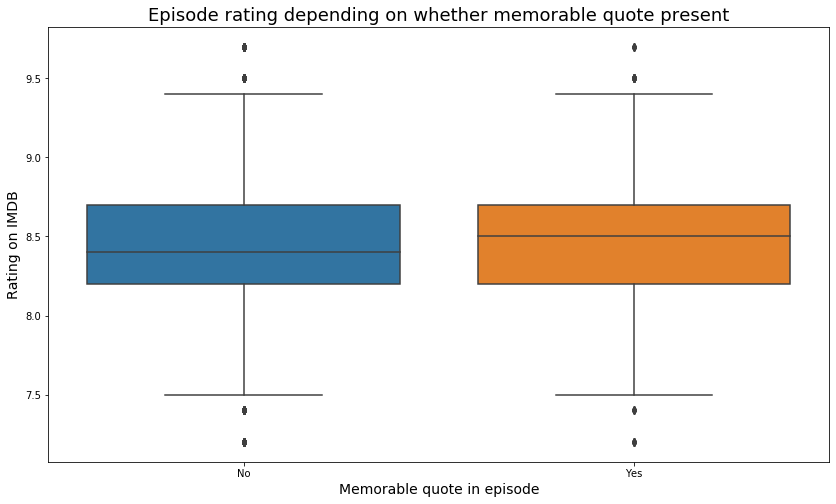

In [86]:
plt.figure(figsize = (14,8))

sns.boxplot(lines1.catchphrase, lines1.Rating)

plt.xlabel('Memorable quote in episode', fontsize = 14)
plt.ylabel('Rating on IMDB', fontsize = 14)

plt.title('Episode rating depending on whether memorable quote present', fontsize = 18)

plt.xticks([0, 1], ['No', 'Yes'])

plt.savefig('./quotes.png')

plt.show()

In [89]:
lines1.groupby('catchphrase').line.count()

catchphrase
0.0    50157
1.0      949
Name: line, dtype: int64

In [90]:
# Select episodes with quotes (henceforth 1st df)
quotes_in_episode = lines1.loc[lines1['catchphrase'] == 1]

# Create rating df (henceforth 2nd df), drop duplicates and convert overall_ep to index
rating_quotes = quotes_in_episode[['overall_ep', 'Rating']]
rating_quotes = rating_quotes.drop_duplicates('overall_ep', keep = 'last')
rating_quotes = rating_quotes.set_index('overall_ep')

# Drop rating columns in 1st df so rating does not sum
quotes_in_episode = quotes_in_episode.drop(columns=['Rating'])

# Sum memorable quotes by episode
quotes = quotes_in_episode.groupby(['overall_ep'])['catchphrase'].sum()

quotes = pd.DataFrame(quotes)

In [91]:
# Select episodes without quotes
no_quotes_in_episode = lines1.loc[lines1['catchphrase'] == 0]

# In episodes without quotes, separate rating and drop duplicates
rating_no_quotes = no_quotes_in_episode[['overall_ep', 'Rating']]
rating_no_quotes = rating_no_quotes.drop_duplicates('overall_ep', keep = 'last')
rating_no_quotes = rating_no_quotes.set_index('overall_ep')

# Drop rating columns in no_quotes_in_episode to have homogenous dfs
no_quotes_in_episode = no_quotes_in_episode.drop(columns=['Rating'])

no_quotes = no_quotes_in_episode.groupby(['overall_ep'])['catchphrase'].sum()

no_quotes = pd.DataFrame(no_quotes)

In [92]:
# Combine dfs, first quotes, then ratings
number_quotes = no_quotes.append(quotes)

ratings = rating_no_quotes.append(rating_quotes)

nq = number_quotes.join(ratings)

nq['overall_ep'] = nq.index

# Remove duplicated observations for episodes that were in both dfs
nq = nq.drop_duplicates('overall_ep', keep = 'last') # Last because the number of quotes appears at the end of df

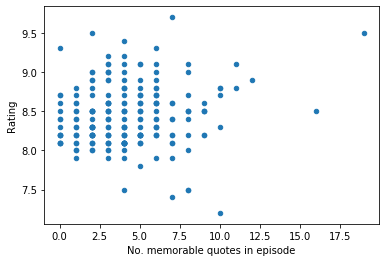

In [95]:
fig, ax = plt.subplots()

nq.plot.scatter(x = 'catchphrase', y = 'Rating', ax = ax)

ax.set_xlabel('No. memorable quotes in episode')

plt.savefig('./rating_by_ep_quotes.png')

plt.show()

In [94]:
# save df with number of quotes per episode
nq.to_csv(r'./number_quotes_in_episodes.csv')

rachel      9320
ross        9092
monica      8467
chandler    8465
joey        8241
Name: character, dtype: int64


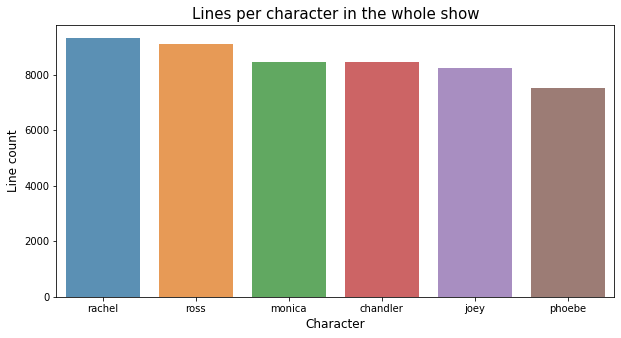

In [98]:
# Total number of lines per character (whole show)
lines_total = lines1.character.value_counts()
print(lines_total.head())

plt.figure(figsize=(10,5))
sns.barplot(lines_total.index, lines_total.values, alpha=0.8)
plt.title('Lines per character in the whole show', fontsize = 15)
plt.ylabel('Line count', fontsize=12)
plt.xlabel('Character', fontsize=12)
plt.savefig('./lines_show.png')
plt.show()

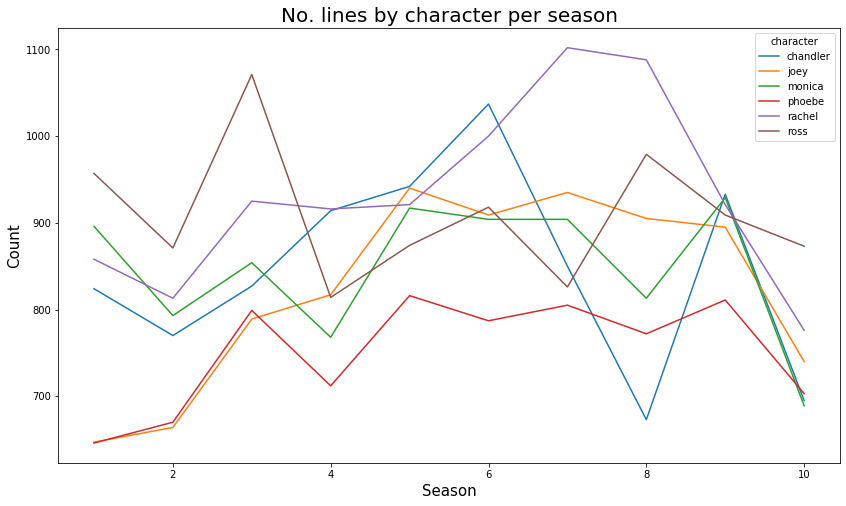

In [107]:
# Plot of number of lines per character per season
ax = lines1.groupby(['character','season'])['season'].count().unstack(0).plot(figsize=(14,8))
_ = ax.set_xlabel('Season', fontsize = 15)
_ = ax.set_ylabel('Count', fontsize = 15)
_ = ax.set_title("No. lines by character per season", fontsize = 20)

plt.savefig('./lines_season.png')

In [108]:
# Exact no. lines per character per season
lines_season = lines1.groupby(['character','season'])['season'].count().unstack(0)

print(lines_season.head())

print(type(lines_season))

character  chandler  joey  monica  phoebe  rachel  ross
season                                                 
1.0             824   647     896     646     858   957
2.0             770   664     793     670     813   871
3.0             827   789     854     799     925  1071
4.0             914   817     768     712     916   814
5.0             942   940     917     816     921   874
<class 'pandas.core.frame.DataFrame'>


In [109]:
lines_episode = lines1.groupby(['character', 'episode', 'season'])['season'].count().unstack(0)

print(lines_episode.head())

print(type(lines_episode))

character       chandler  joey  monica  phoebe  rachel  ross
episode season                                              
1.0     1.0           39    41      73      19      49    47
        2.0           27    22      27      33      46    45
        3.0           41    36      30      19      39    49
        4.0           22    21      26      34      36    44
        5.0           49    22      43      12      45    55
<class 'pandas.core.frame.DataFrame'>


In [81]:
chandler = pd.read_csv('./friends/data/New_Characters/Chandler.csv')

chandler['character'] = 'chandler'

joey = pd.read_csv('./friends/data/New_Characters/Joey.csv')

joey['character'] = 'joey'

monica = pd.read_csv('./friends/data/New_Characters/Monica.csv')

monica['character'] = 'monica'

phoebe = pd.read_csv('./friends/data/New_Characters/Phoebe.csv')

phoebe['character'] = 'phoebe'

rachel = pd.read_csv('./friends/data/New_Characters/Rachel.csv')

rachel['character'] = 'rachel'

ross = pd.read_csv('./friends/data/New_Characters/Ross.csv')

ross['character'] = 'ross'

frames = [chandler, joey, monica, phoebe, rachel, ross]

lines = pd.concat(frames, ignore_index = True)

lines["overall_ep"] = lines["season"].astype(str) + lines["episode"].astype(str)

In [8]:
df = pd.read_csv('./friends/data/episode_info.csv')

df["overall_ep"] = df["season"].astype(str) + df["episode"].astype(str)

df = df.drop_duplicates('overall_ep')
df = df[['overall_ep', 'Rating']]

### Sentiment analysis

In [9]:
sentiment = pd.merge(lines, df, on="overall_ep", how="right")

# lines has more lines, probably because part I & II are organized differently
# For now just leave as it is, and remove the extra lines
sentiment = sentiment.drop(sentiment.index[51106:len(sentiment)])

In [10]:
# Clean line column and save output into new one, Dialogue
chars = re.compile('[/(){}\[\]\|@,;]')
chars2 = re.compile('[^0-9a-z #+_]')
stops = set(stopwords.words('english'))

def clean_text(text):
    text = str(text)
    text = chars.sub(' ', text)
    text = chars2.sub('', text)
    text = re.sub(r'\d+','',text)
    text = ' '.join(word for word in text.split() if word not in stops) # remove stopwors from text
    return text

sentiment['Dialogue'] = sentiment['line'].apply(clean_text) # save all changes to text in new column 'Dialogue'
sentiment['Dialogue'] = sentiment['Dialogue'].str.replace('\d+', '')
sentiment.tail()

,season,episode,scene,quote_index,line,extra,character,overall_ep,Rating,Dialogue
51101,10.0,17.0,23.0,19.0,this is it. unless we're on a break.,[rachel gives him a look.],ross,1017,9.5,unless break
51102,10.0,17.0,23.0,20.0,don't make jokes now.,[they kiss again.],ross,1017,9.5,dont make jokes
51103,10.0,17.0,24.0,2.0,wow.,NaN,ross,1017,9.5,wow
51104,10.0,17.0,24.0,8.0,"uh, i haven't.",NaN,ross,1017,9.5,uh havent
51105,10.0,17.0,24.0,10.0,do you realise we almost made it ten years wit...,NaN,ross,1017,9.5,realise almost made ten years without coming


In [15]:
# Tokenize new column
sentiment['toks'] = sentiment.apply(lambda row: nltk.word_tokenize(row['Dialogue']), axis = 1)

In [20]:
sentiment.sample(10)

,season,episode,scene,quote_index,line,extra,character,overall_ep,Rating,Dialogue,toks
39053,8.0,14.0,3.0,28.0,"okay, if it means that much to you…",NaN,monica,814,8.2,okay means much,"[okay, means, much]"
38335,8.0,11.0,12.0,3.0,come here. i can breath through my mouth.,NaN,monica,811,8.0,come breath mouth,"[come, breath, mouth]"
40135,8.0,19.0,3.0,30.0,hey! we totally forgot about lunch!,NaN,ross,819,7.5,hey totally forgot lunch,"[hey, totally, forgot, lunch]"
15983,4.0,7.0,8.0,3.0,"well, kinda. yeah. yeah.",NaN,phoebe,47,8.7,well kinda yeah yeah,"[well, kinda, yeah, yeah]"
6238,2.0,8.0,9.0,4.0,what?,NaN,phoebe,28,8.5,,[]
27727,6.0,12.0,11.0,17.0,we’ll each tell you how we came up with the jo...,NaN,ross,612,8.1,well tell came joke decide one us telling truthme,"[well, tell, came, joke, decide, one, us, tell..."
48056,10.0,6.0,9.0,9.0,may 12th?,[annoyed],ross,106,8.2,may th,"[may, th]"
37186,8.0,5.0,11.0,15.0,it’s just i always thought when i had another ...,NaN,ross,85,8.1,always thought another kid would different ii ...,"[always, thought, another, kid, would, differe..."
15199,4.0,3.0,2.0,1.0,"oh! good thing chandler’s not here, he always ...",NaN,rachel,43,8.5,oh good thing chandlers always wins game,"[oh, good, thing, chandlers, always, wins, game]"
16498,4.0,10.0,7.0,7.0,why not?! i’d be thrilled if i heard that some...,NaN,chandler,410,8.1,id thrilled heard hot girl looking getoh see,"[id, thrilled, heard, hot, girl, looking, geto..."


##### No. lines of each character

In [17]:
# I could have have calculated number of lines with line and skipping all the lang processing, 
# but I wanted to try different functions =D
print("Total no. lines")
print()
print(sentiment.groupby('character').toks.count())

Total no. lines

character
chandler    8465
joey        8241
monica      8467
phoebe      7521
rachel      9320
ross        9092
Name: toks, dtype: int64


In [18]:
print("No. lines per season")
print()
print(sentiment.groupby(['season', 'character']).toks.count())

No. lines per season

season  character
1.0     chandler      824
        joey          647
        monica        896
        phoebe        646
        rachel        858
        ross          957
2.0     chandler      770
        joey          664
        monica        793
        phoebe        670
        rachel        813
        ross          871
3.0     chandler      827
        joey          789
        monica        854
        phoebe        799
        rachel        925
        ross         1071
4.0     chandler      914
        joey          817
        monica        768
        phoebe        712
        rachel        916
        ross          814
5.0     chandler      942
        joey          940
        monica        917
        phoebe        816
        rachel        921
        ross          874
6.0     chandler     1037
        joey          909
        monica        904
        phoebe        787
        rachel       1000
        ross          918
7.0     chandler      85

###### Vocabulary richness

In [19]:
# Create corpora with each character's tokens
ro = sentiment[sentiment['character'] == 'ross'].drop(sentiment.columns[2:7], axis = 1)
ra = sentiment[sentiment['character'] == 'rachel'].drop(sentiment.columns[2:7], axis = 1)
mo = sentiment[sentiment['character'] == 'monica'].drop(sentiment.columns[2:7], axis = 1)
ch = sentiment[sentiment['character'] == 'chandler'].drop(sentiment.columns[2:7], axis = 1)
jo = sentiment[sentiment['character'] == 'joey'].drop(sentiment.columns[2:7], axis = 1)
ph = sentiment[sentiment['character'] == 'phoebe'].drop(sentiment.columns[2:7], axis = 1)

#ph.tail()

In [23]:
# Split corpora into items to find out whose vocab is richer
ro_split = pd.DataFrame(ro.Dialogue.str.split(' ').tolist(), index = ro.overall_ep).stack()
ro_split = ro_split.reset_index([0, 'overall_ep'])
ro_split.columns = ['overall_ep', 'token']


ra_split = pd.DataFrame(ra.Dialogue.str.split(' ').tolist(), index = ra.overall_ep).stack()
ra_split = ra_split.reset_index([0, 'overall_ep'])
ra_split.columns = ['overall_ep', 'token']


mo_split = pd.DataFrame(mo.Dialogue.str.split(' ').tolist(), index = mo.overall_ep).stack()
mo_split = mo_split.reset_index([0, 'overall_ep'])
mo_split.columns = ['overall_ep', 'token']

ch_split = pd.DataFrame(ch.Dialogue.str.split(' ').tolist(), index = ch.overall_ep).stack()
ch_split = ch_split.reset_index([0, 'overall_ep'])
ch_split.columns = ['overall_ep', 'token']

jo_split = pd.DataFrame(jo.Dialogue.str.split(' ').tolist(), index = jo.overall_ep).stack()
jo_split = jo_split.reset_index([0, 'overall_ep'])
jo_split.columns = ['overall_ep', 'token']

ph_split = pd.DataFrame(ph.Dialogue.str.split(' ').tolist(), index = ph.overall_ep).stack()
ph_split = ph_split.reset_index([0, 'overall_ep'])
ph_split.columns = ['overall_ep', 'token']

In [116]:
# Calculate vocab richness 
print('ross', ro_split.token.nunique())

ross 6292
        overall_ep  token
token                    
               177      1
aa               4      1
aaah             2      1
aaahhh           1      1
aaand            2      1
...            ...    ...
yyou             1      1
yyoure           1      1
zone             1      1
zoo              3      1
zoos             2      1

[6292 rows x 2 columns]


In [115]:
print('monica', mo_split.token.nunique())
print('chandler', ch_split.token.nunique())
print('rach', ra_split.token.nunique())
print('joey', jo_split.token.nunique())
print('phoebs', ph_split.token.nunique())

monica 5410
chandler 6194
rach 5596
joey 5755
phoebs 5769


ross 6292     
monica 5410     
chandler 6194     
rach 5596     
joey 5755     
phoebs 5769      

In [39]:
ro_split['char'] = 'ross'
ra_split['char'] = 'rach'
mo_split['char'] = 'moni'
ch_split['char'] = 'chan'
jo_split['char'] = 'joey'
ph_split['char'] = 'phoe'

words = ro_split.append(ra_split).append(mo_split).append(ch_split).append(jo_split).append(ph_split)

##### Most frequent words

In [33]:
print('ROSS')
print(ro_split.token.value_counts().sort_values(ascending=False))

im            928
oh            886
okay          834
yeah          823
know          736
             ... 
discussion      1
dorm            1
girlie          1
realizes        1
chapel          1
Name: token, Length: 6292, dtype: int64


In [36]:
print('RACHEL')
print(ra_split.token.value_counts().sort_values(ascending=False))
print('\nMONICA')
print(mo_split.token.value_counts().sort_values(ascending=False))
print('\nCHANDLER')
print(ch_split.token.value_counts().sort_values(ascending=False))
print('\nJOEY')
print(jo_split.token.value_counts().sort_values(ascending=False))
print('\nPHOEBS')
print(ph_split.token.value_counts().sort_values(ascending=False))

RACHEL
oh            1864
im             985
know           862
well           834
okay           818
              ... 
reschedule       1
nudity           1
admitted         1
oprah            1
jujujust         1
Name: token, Length: 5596, dtype: int64

MONICA
oh          944
im          709
okay        674
dont        576
know        552
           ... 
affect        1
gettting      1
fabulous      1
ont           1
bothered      1
Name: token, Length: 5410, dtype: int64

CHANDLER
im           797
oh           757
okay         700
well         648
know         612
            ... 
apart          1
bobs           1
whilst         1
corralled      1
scares         1
Name: token, Length: 6194, dtype: int64

JOEY
hey           988
yeah          928
oh            811
im            807
know          673
             ... 
youreyoure      1
bowmonts        1
garlic          1
lydia           1
others          1
Name: token, Length: 5755, dtype: int64

PHOEBS
oh            1434
okay        

In [52]:
ro_rat = ro_split.set_index('overall_ep').join(trans.set_index('overall_ep'))

ro_rat.reset_index(inplace= True)

ro_rat.sample(20)

,overall_ep,token,char,Rating
111848,1010,see,ross,8.0
4771586,415,show,ross,8.5
9150773,76,okay,ross,8.9
9575160,815,tosaltwater,ross,8.4
10798511,913,guy,ross,8.2
11309769,921,know,ross,8.2
3391023,311,somebodys,ross,8.6
2960979,224,good,ross,8.2
4576432,410,late,ross,8.1
4829603,416,appetisers,ross,8.2


In [54]:
ro_rat['token'] == 'wedding' # returns boolean

In [56]:
wed = ro_rat.loc[ro_rat['token'] == 'wedding'] # selects rows

In [59]:
ro_rat.loc[(ro_rat['token'] == 'wedding'), 'wed'] = 1
ro_rat.loc[(ro_rat['token'] != 'wedding'), 'wed'] = 0

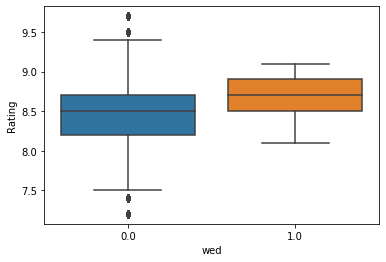

In [111]:
ax = sns.boxplot(x = 'wed', y = 'Rating', data = ro_rat)

In [112]:
ro_rat.loc[(ro_rat['token'] == 'love'), 'love'] = 1
ro_rat.loc[(ro_rat['token'] != 'love'), 'love'] = 0

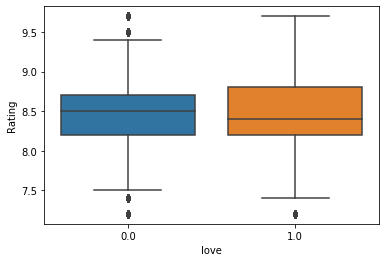

In [113]:
ax = sns.boxplot(x = 'love', y = 'Rating', data = ro_rat)

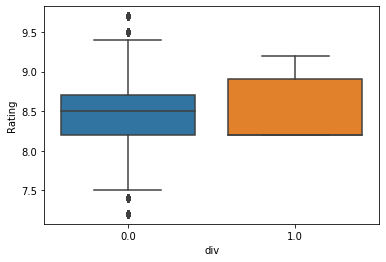

In [114]:
ro_rat.loc[(ro_rat['token'] == 'divorce'), 'div'] = 1
ro_rat.loc[(ro_rat['token'] != 'divorce'), 'div'] = 0

ax = sns.boxplot(x = 'div', y = 'Rating', data = ro_rat)

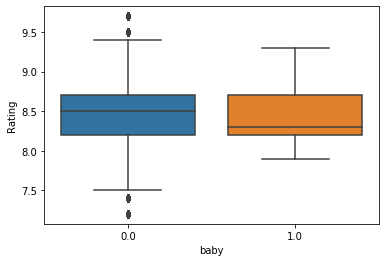

In [115]:
ro_rat.loc[(ro_rat['token'] == 'baby'), 'baby'] = 1
ro_rat.loc[(ro_rat['token'] != 'baby'), 'baby'] = 0

ax = sns.boxplot(x = 'baby', y = 'Rating', data = ro_rat)

In [41]:
sentiment.sample()

,season,episode,scene,quote_index,line,extra,character,overall_ep,Rating,Dialogue,toks
17694,4.0,15.0,6.0,21.0,that’s ‘cause-‘cause you’re mom’s dog kept-kep...,NaN,ross,415,8.5,thats causecause youre moms dog keptkept looking,"[thats, causecause, youre, moms, dog, keptkept..."


In [ ]:
trans = sentiment[['overall_ep', 'Rating']]

words = words.set_index('overall_ep').join(trans.set_index('overall_ep'))

words.reset_index(inplace= True)

In [ ]:
## TOO COMPUTATIONALLY EXPENSIVE

wedding = words['token'] == 'wedding'

In [ ]:
options = ['Math', 'Science'] 
  
# selecting rows based on condition 
rslt_df = dataframe.loc[~dataframe['Stream'].isin(options)]  # selects rows different from options

In [ ]:
from nltk.stem import SnowballStemmer
from wordcloud import WordCloud

In [4]:
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in tokenize(text)]

In [ ]:
# throws back error
lemmas = words.tokens.apply(lemmatize_text) # lemmas get 'basic word', stems get parent morphemes

lemmas.head()

In [164]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(stems)

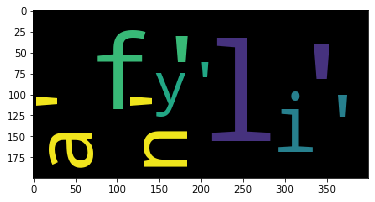

In [165]:
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show
wordcloud.to_file("img/first_review.png")

In [ ]:
from nltk import FreqDist
FreqDist(ro_split.token).sort()

In [211]:
len(dist_phoebs)

47

In [213]:
vocab_rach=list(dist_rach.keys())
vocab_ross=list(dist_ross.keys())
vocab_mon=list(dist_mon.keys())
vocab_phoebs=list(dist_phoebs.keys())
vocab_joe=list(dist_joe.keys())
vocab_chandler=list(dist_chandler.keys())

In [214]:
vocab_mon[:10]

['tell',
 '1',
 'thought',
 '8462',
 'line',
 'dtype',
 '3',
 'harder',
 'name',
 'minute']

In [215]:
words_rach=[w for w in rachel_corpus if len(w)>3]# and dist_rach[w]>1]
words_mon=[w for w in mon_corpus if len(w)>3] #and dist_mon[w]>50]
words_ross=[w for w in ross_corpus if len(w)>3] #and dist_ross[w]>50]
words_phoebs=[w for w in phoebs_corpus if len(w)>3] #and dist_phoebs[w]>50]
words_joe=[w for w in joe_corpus if len(w)>3]# and dist_joe[w]>50]
words_chandler=[w for w in chandler_corpus if len(w)>3]# and dist_chandler[w]>50]

In [219]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/lfa/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [220]:
WNLemma=nltk.WordNetLemmatizer()#Lemmatization stemming, but all stems are valid words
stem_freq_words_rach=[WNLemma.lemmatize(t) for t in words_rach]
stem_freq_words_ross=[WNLemma.lemmatize(t) for t in words_ross]
stem_freq_words_chandler=[WNLemma.lemmatize(t) for t in words_chandler]
stem_freq_words_mon=[WNLemma.lemmatize(t) for t in words_mon]
stem_freq_words_phoebs=[WNLemma.lemmatize(t) for t in words_phoebs]
stem_freq_words_joe=[WNLemma.lemmatize(t) for t in words_joe]

In [221]:
stem_freq_words_mon

['tell',
 'thought',
 '8462',
 'line',
 'dtype',
 'harder',
 'name',
 'minute',
 'promised',
 'even',
 'time',
 '8466',
 'stuff',
 'yeah',
 'honey',
 'summer',
 'relax',
 'nothing',
 'carol',
 'wait',
 '8465',
 'date',
 'forgot',
 '8463',
 'treeger',
 'sweetie',
 'would',
 'true',
 'today',
 '8464',
 'looking',
 'object',
 '8467',
 'everybody',
 'moved',
 'okay',
 'length']

#### No. lines by character per episode

In [160]:
lines_perepisode = lines.groupby(['season', 'episode', 'character'])['line'].count()

lines_ep = lines_perepisode.reset_index()

lines_ep = pd.DataFrame(lines_ep)

lines_ep['season'] = lines_ep['season'].astype(int)
lines_ep['episode'] = lines_ep['episode'].astype(int)


lines_ep["overall_ep"] = lines_ep["season"].astype(str) + lines_ep["episode"].astype(str)

In [165]:
lines_ep = pd.merge(lines_ep, df, on="overall_ep", how="right")

lines_ep = lines_ep.drop(lines.index[1362:len(lines_ep)])

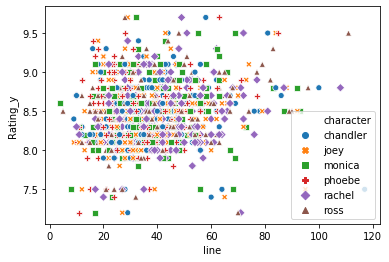

In [177]:
ax = sns.scatterplot(x = 'line', y = 'Rating_y', hue = 'character',
                     style = 'character', data = lines_ep)

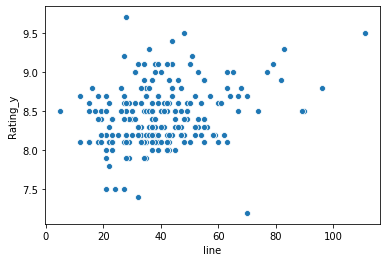

In [179]:
rss = lines_ep.loc[lines_ep['character'] == 'ross']

ax = sns.scatterplot(x = 'line', y = 'Rating_y', data = rss)

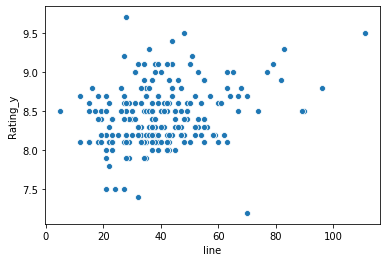

In [180]:
rch = lines_ep.loc[lines_ep['character'] == 'rachel']

ax = sns.scatterplot(x = 'line', y = 'Rating_y', data = rss)

[Text(0, 0.5, 'Episode rating'), Text(0.5, 0, 'No. lines in episode')]

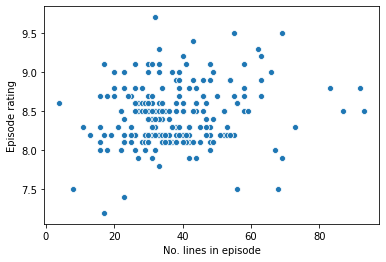

In [181]:
mon = lines_ep.loc[lines_ep['character'] == 'monica']

ax = sns.scatterplot(x = 'line', y = 'Rating_y', data = mon)
ax.set(xlabel = 'No. lines in episode', ylabel = 'Episode rating')

[Text(0, 0.5, 'Episode rating'), Text(0.5, 0, 'No. lines in episode')]

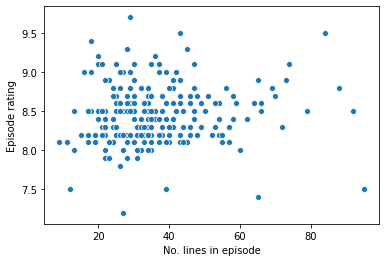

In [182]:
joe = lines_ep.loc[lines_ep['character'] == 'joey']

ax = sns.scatterplot(x = 'line', y = 'Rating_y', data = joe)
ax.set(xlabel = 'No. lines in episode', ylabel = 'Episode rating')

[Text(0, 0.5, 'Episode rating'), Text(0.5, 0, 'No. lines in episode')]

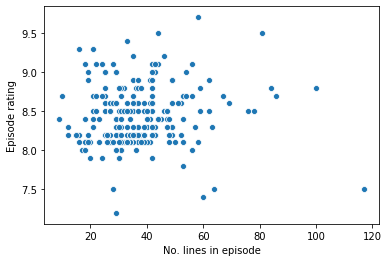

In [183]:
chd = lines_ep.loc[lines_ep['character'] == 'chandler']

ax = sns.scatterplot(x = 'line', y = 'Rating_y', data = chd)
ax.set(xlabel = 'No. lines in episode', ylabel = 'Episode rating')

[Text(0, 0.5, 'Episode rating'), Text(0.5, 0, 'No. lines in episode')]

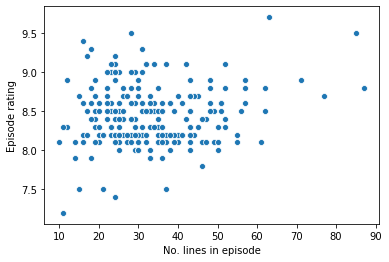

In [184]:
phb = lines_ep.loc[lines_ep['character'] == 'phoebe']

ax = sns.scatterplot(x = 'line', y = 'Rating_y', data = phb)
ax.set(xlabel = 'No. lines in episode', ylabel = 'Episode rating')

In [168]:
lines_ep.tail(15)

,season,episode,character,line,overall_ep,Rating_x,Rating_y
1347,10.0,15.0,phoebe,32.0,1015,8.5,8.5
1348,10.0,15.0,rachel,30.0,1015,8.5,8.5
1349,10.0,15.0,ross,49.0,1015,8.5,8.5
1350,10.0,16.0,chandler,42.0,1016,8.9,8.9
1351,10.0,16.0,joey,30.0,1016,8.9,8.9
1352,10.0,16.0,monica,54.0,1016,8.9,8.9
1353,10.0,16.0,phoebe,30.0,1016,8.9,8.9
1354,10.0,16.0,rachel,44.0,1016,8.9,8.9
1355,10.0,16.0,ross,46.0,1016,8.9,8.9
1356,10.0,17.0,chandler,81.0,1017,9.5,9.5


In [123]:
lines = pd.merge(lines, df, on="overall_ep", how="right")

lines = lines.drop(lines.index[51106:len(lines)]) # drop rows for part IIs

In [124]:
lines["line"] = lines["line"].astype(str)

lines['line_ORIG'] = lines['line']

In [125]:
lines = lines.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

other_stops = {'en':["like", "theres", "right", 'thats', 'this', 'these', 'those',
              'im', 'youre', 'theyre', 'were', 'cant', 'dont', 'isnt', 'doesnt',
              'aint', 'oh', 'hi', 'hello', 'bye', 'youll', 'ohh', 'yknow', 'hey',
                    'would', 'wouldnt', 'uhm', 'ahh', 'uh', 'huh', 'yeah', 
                     'ohhhhhhhhh', 'wow']}

other_stops = set(other_stops['en'])
stops = set.union(STOPWORDS, other_stops)

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in stops) # remove stopwors from text
    return text
lines['token_lines'] = lines['line'].apply(clean_text)
lines['token_lines'] = lines['token_lines'].str.replace('\d+', '')

In [126]:
lines['line_sent'] = lines['token_lines'].apply(lambda x: tb.TextBlob(x).sentiment[0])

lines['token_lines'] = lines['token_lines'].apply(word_tokenize)

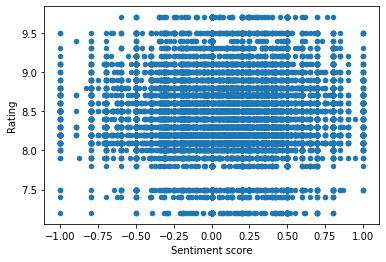

In [127]:
fig, ax = plt.subplots()

lines.plot.scatter(x = 'line_sent', y = 'Rating', ax = ax)

ax.set_xlabel('Sentiment score')

plt.show()

In [3]:
# Load data and check columns
np.random.seed(440)
X = pd.read_csv('./friends/data/with_rows_removed_addedrows.csv')

allcols=[col for col in X]
allcols

['season',
 'episode',
 'title',
 'director',
 'release_date',
 'all_cast',
 'Rating',
 'number_of_reviews',
 'short_summary',
 'writer',
 'views',
 'month',
 'central_perk_loc',
 'monicas_loc',
 'chandlers_loc',
 'ross_loc',
 'monicas_lines',
 'rachel_lines',
 'ross_lines',
 'phoebe_lines',
 'joey_lines',
 'chandler_lines',
 'all_lines',
 'num_guest_stars',
 'common_director',
 'epi_type',
 'title_about',
 'gunther',
 'janice',
 'richard',
 'heckles',
 'frank',
 'estelle',
 'ursula',
 'part_1',
 'rat_grouped']

In [5]:
# Remove unnecessary columns 
X_sub = X[allcols[6:len(X)-1]]

X_sub = X_sub.drop(columns=['number_of_reviews', 'short_summary', 'writer'])
#X = dataset.iloc[:, [3,4]].values     # select which columns are going to be analyzed

subsetcols=[col for col in X_sub]
subsetcols

['Rating',
 'views',
 'month',
 'central_perk_loc',
 'monicas_loc',
 'chandlers_loc',
 'ross_loc',
 'monicas_lines',
 'rachel_lines',
 'ross_lines',
 'phoebe_lines',
 'joey_lines',
 'chandler_lines',
 'all_lines',
 'num_guest_stars',
 'common_director',
 'epi_type',
 'title_about',
 'gunther',
 'janice',
 'richard',
 'heckles',
 'frank',
 'estelle',
 'ursula',
 'part_1',
 'rat_grouped']

In [21]:
# Split predictor variables into dataframes categorial types 
continuous=X_sub[subsetcols[0:15]].drop(columns = ['month'])
categorical=X_sub.iloc[:, [2,15,16,17,26]]
binary=X_sub[subsetcols[18:26]] # len(subsetcols)

## Mixed data - Gower distance

In [29]:
import gower
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

dm = gower.gower_matrix(X_sub)
Zd = linkage(dm)

/Users/lfa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """


In [30]:
cld = fcluster(Zd, 3, criterion = 'maxclust')
cld

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
shc.dendrogram(Zd)

# Hierarchical clustering in continuous data

In [84]:
# Analytics Vidhya way
# https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/
from sklearn.preprocessing import normalize
cont_scaled = normalize(continuous)
cont_scaled = pd.DataFrame(cont_scaled, columns=continuous.columns)
cont_scaled.head()

,central_perk_loc,monicas_loc,chandlers_loc,ross_loc,monicas_lines,rachel_lines,ross_lines,phoebe_lines,joey_lines,chandler_lines,all_lines,num_guest_stars
0,0.342540,0.570900,0.000000,0.34254,0.418151,0.269220,0.274949,0.108834,0.234852,0.217668,0.045825,0.0
1,0.204152,0.612455,0.000000,0.00000,0.260908,0.354089,0.587042,0.130454,0.074545,0.149090,0.018636,0.0
2,0.541883,0.406412,0.135471,0.00000,0.411156,0.205578,0.260926,0.300460,0.221392,0.276740,0.166044,0.0
3,0.338436,0.676871,0.000000,0.00000,0.352369,0.302030,0.280457,0.222927,0.172589,0.230118,0.028765,0.0
4,0.721665,0.120278,0.000000,0.00000,0.266834,0.299178,0.323436,0.185975,0.291092,0.283006,0.000000,0.0


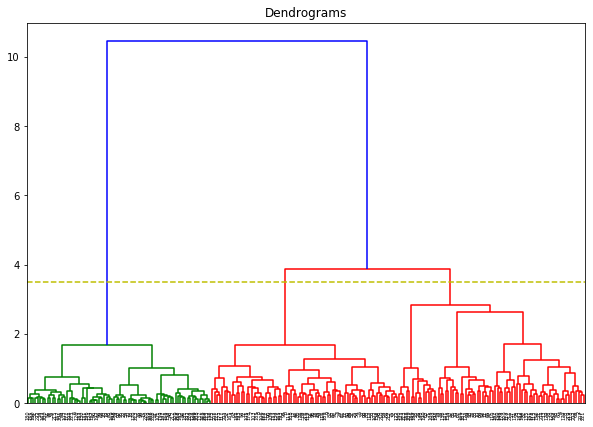

In [85]:
# create dendrogram for continuous variables
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(cont_scaled, method='ward'))

plt.axhline(y=3.5, color='y', linestyle='--')

In [86]:
# It seems there are three-ish main clusters
# Try first with three clusters

from sklearn.cluster import AgglomerativeClustering

# define the model
cluster3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

# fit model and predict clusters
yhat_cont3 = cluster3.fit_predict(cont_scaled)

In [87]:
yhat_cont3

array([2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 0, 0, 2, 0, 1, 1, 1, 2, 2, 1, 1, 0,
       1, 2, 2, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 1, 2, 0, 0, 1, 1, 1, 2, 0,
       1, 1, 1, 0, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 0, 2, 2, 0, 0, 0,
       2, 0, 1, 0, 1, 0, 2, 0, 0, 2, 0, 1, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 0, 1, 1, 2, 1, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 2, 1,
       0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       2, 2, 2, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 1,
       0, 1, 0, 1, 1, 1, 1, 2, 0, 1, 0, 2, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2,
       2, 2, 2, 0, 1, 1, 0, 1, 2, 2, 0, 0, 0, 2, 0, 0, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 0, 2, 0, 2, 1, 0, 1, 0, 2, 0, 1, 0, 1, 1, 2, 2, 1, 0,
       1, 0, 1, 1, 1, 1, 1])

In [88]:
# Try now with two clusters

cluster2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

# fit model and predict clusters
yhat_cont2 = cluster2.fit_predict(cont_scaled)
yhat_cont2

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1])

# Hierarchical clustering in categorical data

In [25]:
categorical

,month,common_director,epi_type,title_about,rat_grouped
0,9,James Burrows,prem,['monica'],av
1,9,James Burrows,reg,other,below
2,10,James Burrows,reg,other,below
3,10,James Burrows,reg,other,below
4,10,other,reg,other,av
...,...,...,...,...,...
222,2,Gary Halvorson,reg,['joey'],av
223,2,Gary Halvorson,reg,other,av
224,4,Gary Halvorson,reg,other,av
225,4,Gary Halvorson,reg,['rachel'],above


In [89]:
# Analysis does not accept categorical data, so convert values to floats

cat_float = categorical.replace({'epi_type': {'prem': 1, 'reg': 0, 'fin': 2}})
cat_float = cat_float.replace({'title_about': {'[\'chandler\']': 1, '[\'joey\']': 2, '[\'monica\']': 3,
                               '[\'phoebe\']': 4, '[\'rachel\']': 5, '[\'ross\']': 6,
                               '[\'chandler\', \'monica\']': 7, '[\'rachel\', \'joey\']': 8,
                               '[\'rachel\', \'ross\']': 9, '[\'ross\', \'chandler\']': 10,
                               '[\'ross\', \'monica\']': 11, 'other': 12}})
#X = X.replace({'rat_grouped': {'av': 1, 'below': 0, 'above': 2}})

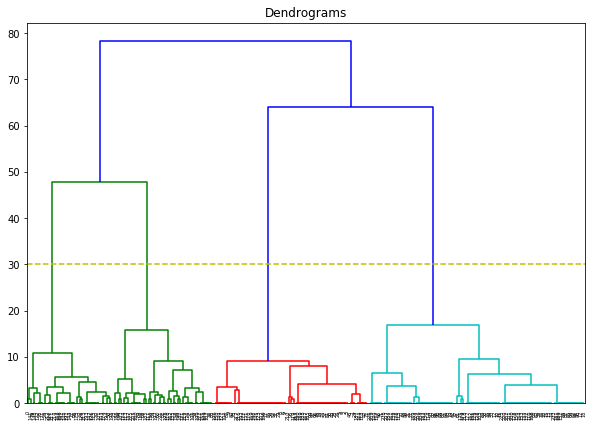

In [90]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(cat_float, method='ward'))

plt.axhline(y=30, color='y', linestyle='--')

In [91]:
# It seems there are four main clusters

# define the model
cluster4 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

# fit model and predict clusters
yhat_cat = cluster.fit_predict(cat_float)
yhat_cat

array([0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 2, 0, 0, 2, 2, 1, 0,
       1, 0, 0, 1, 1, 0, 1])

# Hierarchical clustering for binary variables

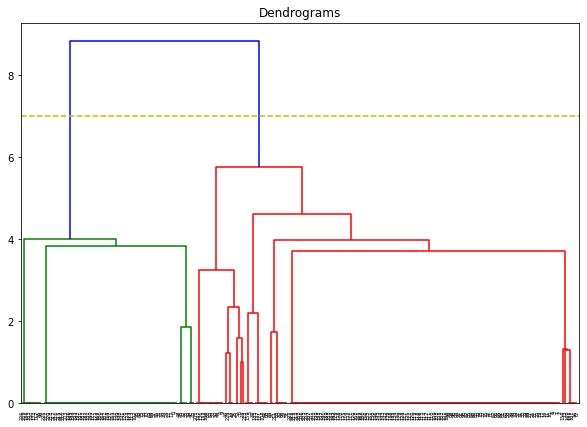

In [92]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(binary, method='ward'))

plt.axhline(y=7, color='y', linestyle='--')

In [93]:
# fit model and predict clusters
yhat_bin = cluster2.fit_predict(cat_float)
yhat_bin

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0])

In [94]:
# Hierarchical clustering for all non-continuous data

# convert categorical df to binary
def prepare(df,cols):
    df[cols] = df[cols].astype(str)
    
    dummies = pd.get_dummies(df[cols])
    

    return dummies

# One hot encode the categorical data
cat_dummies = prepare(cat_float,categorical.columns)

# combine categorical and binary df
mergedDf = cat_dummies.merge(binary, left_index=True, right_index=True)

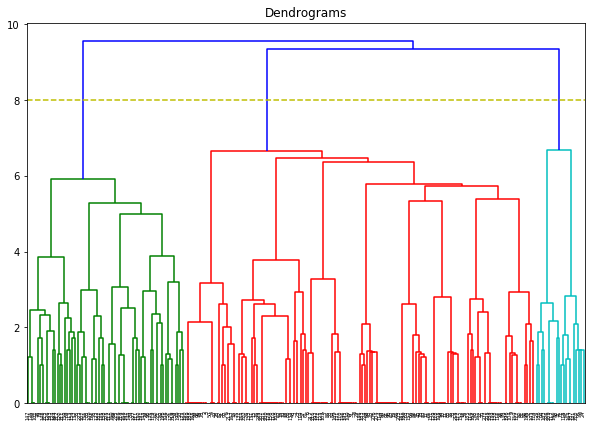

In [95]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(mergedDf, method='ward'))

plt.axhline(y=8, color='y', linestyle='--')

In [96]:
yhat_merged = cluster3.fit_predict(mergedDf)
yhat_merged

array([0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1,
       2, 1, 1, 1, 2, 2, 2, 0, 0, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2,
       2, 2, 1, 1, 2, 1, 2, 2, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 1, 1, 1, 2, 2, 0, 0, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1,
       1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 1, 1, 2, 1, 1, 2, 2, 2, 1,
       2, 1, 1, 2, 2, 1, 0])

# Hierarchical clustering for all predictors

In [122]:
from sklearn import preprocessing

# combine dfs without rescaling and then rescale
allpred = continuous.merge(mergedDf, left_index=True, right_index=True)
allpred_stand = preprocessing.scale(allpred)

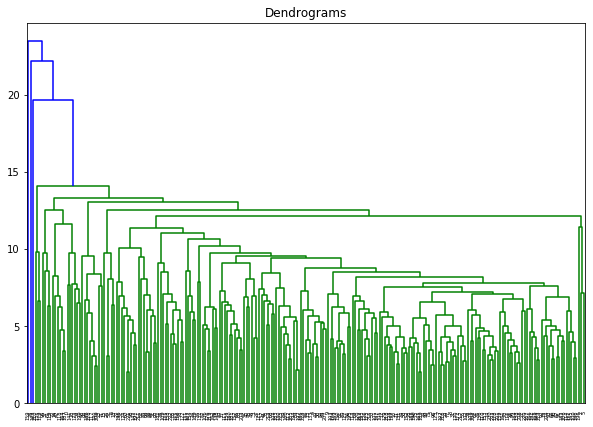

In [210]:
# single, centroid, average, complete, weighted, median methods return two clusters
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(allpred_stand, method='weighted')) #,
#                      truncate_mode = 'lastp',
#                      p = 10,
#                      show_contracted = True)

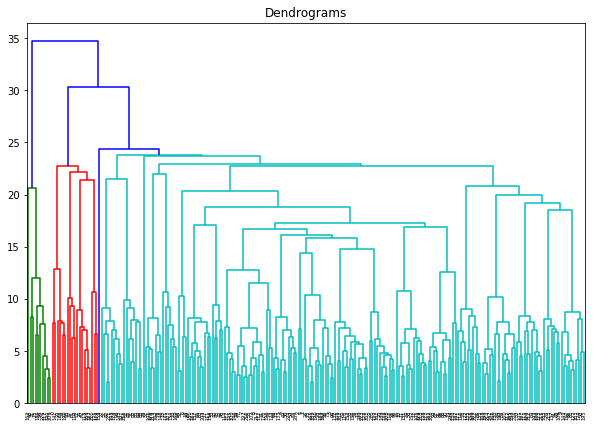

In [137]:
# only ward returns 3
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(allpred_stand, method='ward'))



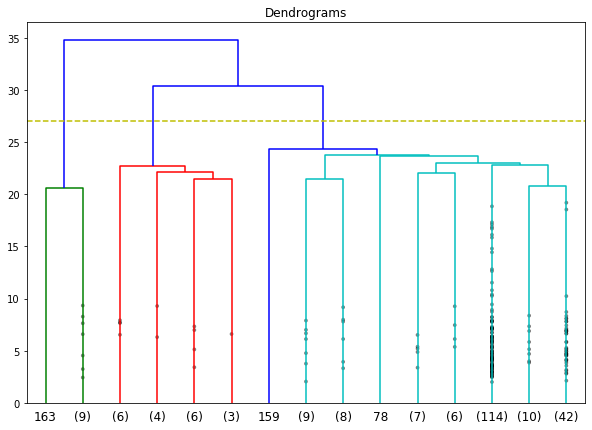

In [170]:
# only ward returns 3, truncated for easier visualization
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(allpred_stand, method='ward'), 
                      truncate_mode = 'lastp',
                      p = 15,
                      show_contracted = True)

plt.axhline(y=27, color='y', linestyle='--') # y signals where the cut for no. clusters is being made

How to choose the optimal number of clusters based on the output of this analysis, the dendrogram? As a rule of thumb, look for the clusters with the longest ‘branches’, the shorter they are, the more similar they are to following ‘twigs’ and ‘leaves’. But keep in mind that, as always, the optimal number will also depend on the context, expert knowledge, application, etc.

### Fit model

In [164]:
cluster_all = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

yhat_all = cluster_all.fit_predict(allpred)
yhat_all

array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1])

In [199]:
from scipy.cluster.hierarchy import single, cophenet
from scipy.spatial.distance import pdist, squareform

In [202]:
Z = single(pdist(allpred))
Z


array([[3.00000000e+00, 1.89000000e+02, 1.21620067e-01, 2.00000000e+00],
       [5.50000000e+01, 1.02000000e+02, 1.28866687e-01, 2.00000000e+00],
       [1.12000000e+02, 2.05000000e+02, 1.31505883e-01, 2.00000000e+00],
       [6.00000000e+01, 2.21000000e+02, 1.42750523e-01, 2.00000000e+00],
       [1.65000000e+02, 2.27000000e+02, 1.47231828e-01, 3.00000000e+00],
       [1.40000000e+02, 2.09000000e+02, 1.55651891e-01, 2.00000000e+00],
       [1.64000000e+02, 1.87000000e+02, 1.57410882e-01, 2.00000000e+00],
       [1.40000000e+01, 2.00000000e+02, 1.63344939e-01, 2.00000000e+00],
       [2.00000000e+00, 2.31000000e+02, 1.73498954e-01, 4.00000000e+00],
       [7.00000000e+00, 2.16000000e+02, 1.82039303e-01, 2.00000000e+00],
       [1.38000000e+02, 2.08000000e+02, 1.84533757e-01, 2.00000000e+00],
       [9.60000000e+01, 2.35000000e+02, 1.85062951e-01, 5.00000000e+00],
       [2.01000000e+02, 2.34000000e+02, 1.86027936e-01, 3.00000000e+00],
       [1.00000000e+01, 1.10000000e+01, 1.86828626e

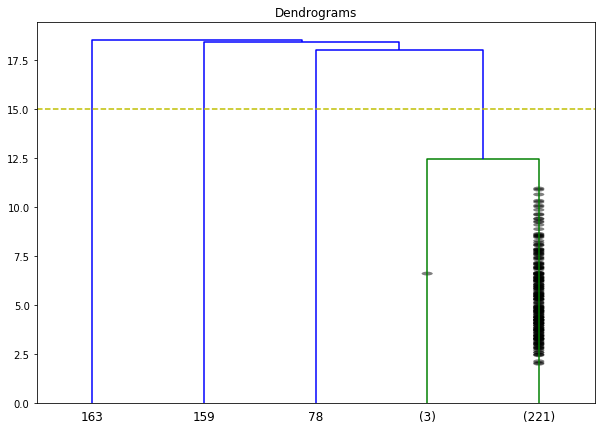

In [175]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(allpred_stand, method='average'),
                      truncate_mode = 'lastp',
                      p = 5,
                      show_contracted = True)

plt.axhline(y=15, color='y', linestyle='--')

### Cophenetic distances

One criterion that has become popular is to use the result that has largest cophenetic correlation coefficient. This is the correlation between the original distances and those that result from the cluster configuration. Values above 0.75 are felt to be good. The Group Average method appears to produce high values of this statistic. This may be one reason that it is so popular.

In [203]:
cophenet(Z)

array([1.4752464 , 1.4752464 , 1.4752464 , ..., 1.4202715 , 1.74309947,
       1.74309947])

In [206]:
squareform(cophenet(Z))

array([[0.        , 1.4752464 , 1.4752464 , ..., 1.4752464 , 1.4752464 ,
        1.74309947],
       [1.4752464 , 0.        , 1.41984811, ..., 1.41984811, 1.4202715 ,
        1.74309947],
       [1.4752464 , 1.41984811, 0.        , ..., 1.41712778, 1.4202715 ,
        1.74309947],
       ...,
       [1.4752464 , 1.41984811, 1.41712778, ..., 0.        , 1.4202715 ,
        1.74309947],
       [1.4752464 , 1.4202715 , 1.4202715 , ..., 1.4202715 , 0.        ,
        1.74309947],
       [1.74309947, 1.74309947, 1.74309947, ..., 1.74309947, 1.74309947,
        0.        ]])

### Delta

A second measure of goodness of fit called delta is described in Mather (1976). These statistics measure degree of distortion rather than degree of resemblance (as with the cophenetic correlation).

In [ ]:
# Not done yet

In [208]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [209]:
W = linkage(allpred, 'ward')

pd.DataFrame(W, columns = ['cluster_1','cluster_2', 'cluster_3', 'distance','new_cluster_size'])

ValueError: Shape of passed values is (226, 4), indices imply (226, 5)

In [207]:
dendrogram(W)

plt.show()

NameError: name 'W' is not defined

In [ ]:
fcluster(W,t=.4,criterion='inconsistent')

In [173]:
cluster4 = AgglomerativeClustering(n_clusters=4, affinity='cosine', linkage='average')

yhat_all4 = cluster4.fit_predict(allpred)
yhat_all4

# This would fit good according to 
# https://www.dummies.com/programming/big-data/data-science/data-science-performing-hierarchical-clustering-with-python/

array([1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 3, 3, 2, 2, 2, 2, 2,
       2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 0])

### Try adding director variable

In [179]:
dircols=[col for col in X_wdir]
dircols

['month',
 'central_perk_loc',
 'monicas_loc',
 'chandlers_loc',
 'ross_loc',
 'monicas_lines',
 'rachel_lines',
 'ross_lines',
 'phoebe_lines',
 'joey_lines',
 'chandler_lines',
 'all_lines',
 'num_guest_stars',
 'common_director',
 'epi_type',
 'title_about',
 'gunther',
 'janice',
 'richard',
 'heckles',
 'frank',
 'estelle',
 'ursula',
 'part_1']

In [190]:
# Split predictor variables into dataframes categorial types 
catdir=X_wdir.iloc[:, [0,13,14, 15]]
bindir=X_wdir[subsetcols[15:len(subsetcols)]]

In [192]:
catdir.columns
#bindir.columns

Index(['month', 'common_director', 'epi_type', 'title_about'], dtype='object')

In [196]:
catdir_float = catdir.replace({'epi_type': {'prem': 1, 'reg': 0, 'fin': 2}})
catdir_float = catdir_float.replace({'title_about': {'[\'chandler\']': 1, '[\'joey\']': 2, '[\'monica\']': 3,
                               '[\'phoebe\']': 4, '[\'rachel\']': 5, '[\'ross\']': 6,
                               '[\'chandler\', \'monica\']': 7, '[\'rachel\', \'joey\']': 8,
                               '[\'rachel\', \'ross\']': 9, '[\'ross\', \'chandler\']': 10,
                               '[\'ross\', \'monica\']': 11, 'other': 12}})
catdir_float = catdir_float.replace({'common_director': {'James Burrows': 1, 'Peter Bonerz': 2, 'Michael Lembeck': 3,
                               'Gail Mancuso': 4, 'Kevin Bright': 5, 'Gary Halvorson': 6,
                               'David Schwimmer': 7, 'Ben Weiss': 8, 'other': 9}})

In [197]:
cat2_dummies = prepare(catdir_float,catdir.columns)

merged = cat2_dummies.merge(binary, left_index=True, right_index=True)

allmerged = continuous.merge(merged, left_index=True, right_index=True)

all_stand = preprocessing.scale(allmerged)

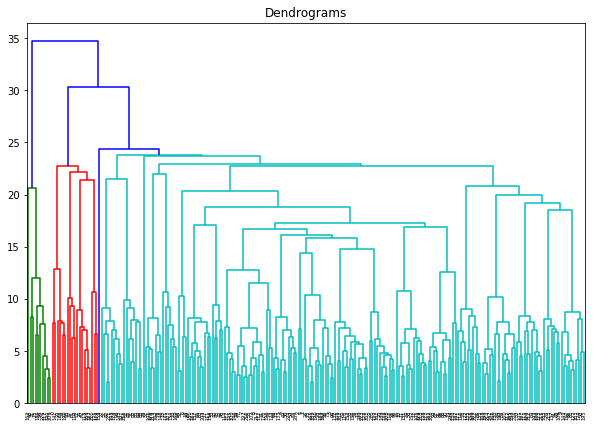

In [198]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(allpred_stand, method='ward'))
# adding directors doesn't seem to change much

# HDBSCAN

In [176]:
import hdbscan

In [160]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

In [177]:
plot_clusters(allpred_stand, hdbscan.HDBSCAN, (), {'min_cluster_size':15})

NameError: name 'time' is not defined

In [ ]:
#from scipy.cluster.hierarchy import fcluster
#k = 3
#cluster = fcluster(allpred_stand, k, criterion = 'maxclust')

In [ ]:
cluster7avco.fit(allpred)
ms = np.column_stack((ground_truth,Hclustering.labels_))
df = pd.DataFrame(ms,
 columns = [‘Ground truth’,’Clusters’])
pd.crosstab(df[‘Ground truth’], df[‘Clusters’],
 margins=True)

In [151]:
friends_Y = X['rat_grouped']
friends_Y = np.array(friends_Y)


array(['av', 'below', 'below', 'below', 'av', 'below', 'above', 'below',
       'below', 'below', 'below', 'below', 'above', 'av', 'below',
       'below', 'av', 'above', 'below', 'below', 'below', 'av', 'above',
       'above', 'av', 'below', 'av', 'below', 'av', 'av', 'above', 'av',
       'below', 'below', 'below', 'above', 'above', 'above', 'av', 'av',
       'av', 'av', 'below', 'below', 'above', 'below', 'below', 'av',
       'above', 'below', 'below', 'below', 'above', 'av', 'av', 'above',
       'below', 'av', 'below', 'below', 'below', 'av', 'above', 'av',
       'av', 'below', 'below', 'above', 'av', 'below', 'below', 'above',
       'above', 'below', 'av', 'below', 'av', 'av', 'above', 'above',
       'below', 'below', 'av', 'above', 'below', 'below', 'av', 'below',
       'av', 'av', 'above', 'av', 'below', 'av', 'above', 'above',
       'above', 'above', 'av', 'above', 'below', 'av', 'above', 'above',
       'below', 'above', 'av', 'below', 'above', 'av', 'av', 'av',
     

In [158]:
plt.scatter([friends_Y == 0, 0], allpred[yhat_allaveu == 0, 1], s = 80, c = 'red')
plt.scatter([friends_Y == 1, 0], allpred[yhat_allaveu == 1, 1], s = 80, c = 'black')
plt.scatter([friends_Y == 2, 0], allpred[yhat_allaveu == 2, 1], s = 80, c = 'yellow')

plt.legend()

TypeError: '(array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False, False, False,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
        True, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
        True, False]), 1)' is an invalid key

In [157]:
friends_Y = np.where(friends_Y=='below', 0, friends_Y)
friends_Y = np.where(friends_Y=='av', 1, friends_Y)
friends_Y = np.where(friends_Y=='above', 2, friends_Y)

In [162]:
plot_clusters(allpred_stand, AgglomerativeClustering, (), {'n_clusters':3, 'linkage':'ward'})

NameError: name 'time' is not defined

In [105]:
AgglomerativeClustering.set_params(allpred.all)

<bound method DataFrame.all of      central_perk_loc  monicas_loc  chandlers_loc  ross_loc  monicas_lines  \
0            0.342540     0.570900       0.000000  0.342540       0.418151   
1            0.204152     0.612455       0.000000  0.000000       0.260908   
2            0.541883     0.406412       0.135471  0.000000       0.411156   
3            0.338436     0.676871       0.000000  0.000000       0.352369   
4            0.721665     0.120278       0.000000  0.000000       0.266834   
..                ...          ...            ...       ...            ...   
222          0.137547     0.206321       0.137547  0.000000       0.082310   
223          0.111922     0.149230       0.037307  0.000000       0.051370   
224          0.143059     0.071529       0.000000  0.071529       0.086684   
225          0.000000     0.421446       0.000000  0.060207       0.173065   
226          0.020407     0.081626       0.020407  0.040813       0.058873   

     rachel_lines  ross_lines  p

In [296]:
from numpy import unique
from numpy import where

# retrieve unique clusters
yhat_clusters = unique(yhat)

# create scatter plot for samples from each cluster
for cluster in yhat_clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == yhat_clusters)
    # create scatter of these samples
    plt.scatter(X_scaled[row_ix, 0], X_scaled[row_ix, 1])
# show the plot
plt.show()
    

/Users/lfa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # Remove the CWD from sys.path while we load stuff.


TypeError: '((array([], dtype=int64),), 0)' is an invalid key

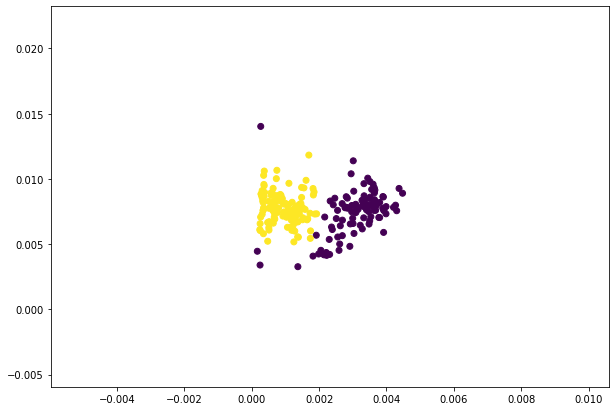

In [269]:
plt.figure(figsize=(10, 7))  
plt.scatter(X_scaled['month'], X_scaled['views'], c=cluster.labels_) 

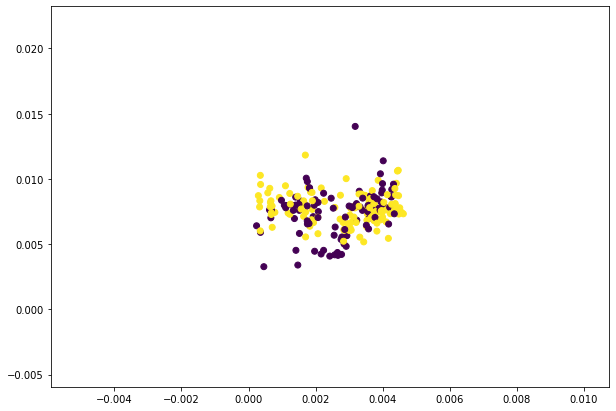

In [284]:
plt.figure(figsize=(10, 7))  
plt.scatter(X_scaled['title_about'], X_scaled['views'], c=cluster.labels_) 

In [248]:
X_scaled.head()

,season,episode,Rating,number_of_reviews,views,month,num_guest_stars,central_perk_loc,monicas_loc,chandlers_loc,monicas_lines,rachel_lines,ross_lines,phoebe_lines,joey_lines,chandler_lines,all_lines,epi_type,rat_grouped,title_about
0,0.000152,0.000152,0.001262,0.999993,0.003268,0.001368,0.0,0.000030,0.000051,0.000000,0.000037,0.000024,0.000024,0.000010,0.000021,0.000019,0.000004,0.000152,0.000152,0.000456
1,0.000202,0.000404,0.001635,0.999986,0.004078,0.001817,0.0,0.000018,0.000055,0.000000,0.000023,0.000032,0.000053,0.000012,0.000007,0.000013,0.000002,0.000000,0.000000,0.002423
2,0.000214,0.000643,0.001757,0.999984,0.004178,0.002143,0.0,0.000057,0.000043,0.000014,0.000043,0.000022,0.000028,0.000032,0.000023,0.000029,0.000018,0.000000,0.000000,0.002571
3,0.000221,0.000884,0.001790,0.999983,0.004354,0.002210,0.0,0.000041,0.000083,0.000000,0.000043,0.000037,0.000034,0.000027,0.000021,0.000028,0.000004,0.000000,0.000000,0.002652
4,0.000222,0.001112,0.001890,0.999983,0.004135,0.002223,0.0,0.000083,0.000014,0.000000,0.000031,0.000035,0.000037,0.000021,0.000034,0.000033,0.000000,0.000000,0.000222,0.002668


In [236]:
# Bootcamp way
Z = linkage(X, 'ward')

pd.DataFrame(Z, columns = ['cluster_1', 'cluster_2', 'distance', 'new_cluster_size'])

,cluster_1,cluster_2,distance,new_cluster_size
0,18.0,19.0,1.853595,2.0
1,53.0,77.0,2.644825,2.0
2,107.0,130.0,3.844639,2.0
3,81.0,150.0,4.384778,2.0
4,49.0,97.0,4.508837,2.0
...,...,...,...,...
221,108.0,446.0,2907.112667,7.0
222,443.0,444.0,3196.032477,99.0
223,447.0,449.0,5377.248963,196.0
224,445.0,448.0,6331.190793,31.0


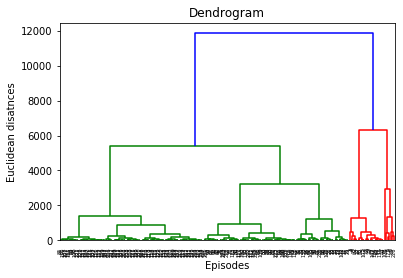

In [237]:
dendrogram(Z)

plt.title('Dendrogram')
plt.xlabel('Episodes')
plt.ylabel('Euclidean disatnces')

plt.show()


In [233]:
fcluster(Z, t = .4, criterion = 'inconsistent')

array([144, 129, 127, 126, 126, 131, 141, 140, 133, 133, 134, 123, 139,
       122, 124, 121, 122, 130, 117, 117, 116, 118, 124, 137, 120, 113,
       114, 105, 105, 120, 130, 102, 111, 102, 107, 119, 142, 123, 112,
       110, 110, 109,  72,  68, 140,  66,  68, 108, 128,  65,  87,  70,
       132,  73,  75, 127,  75,  64,  90,  92,  89, 111, 137,  93,  76,
        94,  94,  67,  96,  85,  74, 104, 136, 100,  88,  84, 101,  73,
        70, 135,  80,   1,  89, 143,   5,   4,  98,  78,  91,   5,  97,
        86,  66,  77,  69, 103, 113,  65,   7,  87,   7,   2, 131, 125,
        14, 116,  10,  11, 145,  85,  98,  17,  44,  74,  41,   6,  39,
        76, 100,  42,  54,  16,  46,   9,  12,  81, 138,  95,  40,  55,
        11,   8,  82, 139,  38,  43,  82,  77, 106,  17,  79,   2,  59,
        57,  58,  50,  63,  36,  47,  51,   1,   9,  19,  55,  19,  44,
        18,  51,  62,  97,  45,  56,  56,  96,   3, 108,  37, 135,  28,
        20,  48,  83, 141,  47,  31,  40,  61,  33,  30,  26,  3

In [240]:
# Fitting hierarchical clustering to the Mall_Customes dataset
# There are two algorithms for hierarchical clustering: 
# Agglomerative Hierarchical Clustering and 
# Divisive Hierarchical Clustering.
# We choose Euclidean distance and ward method for our algorithm class
# (from medium.com, Samet Girgin)

from sklearn.cluster import AgglomerativeClustering 

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')

In [241]:
# Lets try to fit the hierarchical clustering algorithm  to dataset 
# X while creating the clusters vector that tells for each customer 
# which cluster the customer belongs to.

y_hc=hc.fit_predict(X)

In [242]:
# Visualizing the clusters. This code is similar to k-means 
# visualization code. We only replace the y_kmeans vector name to 
# y_hc for the hierarchical clustering

plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c='orange', label ='Cluster 1')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=100, c='purple', label ='Cluster 3')

plt.title('Clusters of Friends episodes (Hierarchical Clustering Model)')
plt.xlabel('xx')
plt.ylabel('yy')
plt.show()

TypeError: '(array([False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False,  True,  True,  True, False,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False]), 0)' is an invalid key

In [19]:
df = pd.read_csv('./friends/data/episode_info.csv')

df["overall_ep"] = df["season"].astype(str) + df["episode"].astype(str)

df = df.drop_duplicates('overall_ep')
df = df.drop(columns=['director', 'release_date', 'all_cast', 'short_summary'])

df_viewers = pd.read_csv('./friends/data/creators.csv')

df_viewers["overall_ep"] = df_viewers["season"].astype(str) + df_viewers["epi"].astype(str)

df_viewers = df_viewers[['overall_ep','vie']]

df_y = pd.merge(df, df_viewers, on='overall_ep')



In [156]:
df_subset = df_y[(df_y.episode == 1) | (df_y.episode > 17)] # >17 because shorter season has 18 episodes

# df_subset.groupby('season').episode.unique()

df_prem = df_subset[(df_subset.episode == 1)] # select premieres
df_s10 = df_subset[(df_subset.episode == 18)] # select last episode (18) in season 10
df_s3_s6 = df_subset[(df_subset.episode == 25)] # select last episode (25) in seasons 3 and 6
df_remain = df_subset[(df_subset.episode == 24) & (df_subset.season != 3) | # select last episodes of remaining seasons
                      (df_subset.episode == 24) & (df_subset.season != 6)] 

prem_fin = df_s10.append([df_s3_s6, df_remain, df_prem])


In [157]:
prem_fin.loc[(prem_fin['episode'] == 1), 'premiere'] = 1
prem_fin.loc[(prem_fin['episode'] != 1), 'premiere'] = 0

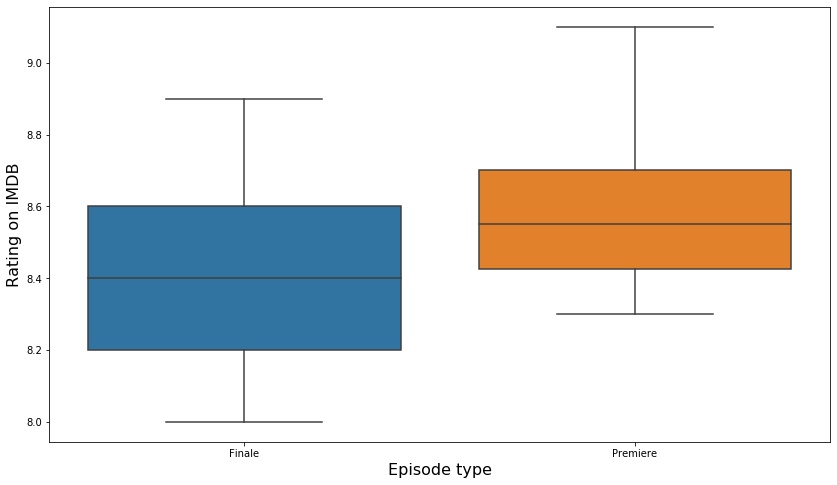

In [159]:
plt.figure(figsize = (14,8))

sns.boxplot(prem_fin.premiere, prem_fin.Rating)

plt.xlabel('Episode type', fontsize = 16)
plt.ylabel('Rating on IMDB', fontsize = 16)

plt.xticks([0, 1], ['Finale', 'Premiere'])

plt.show()

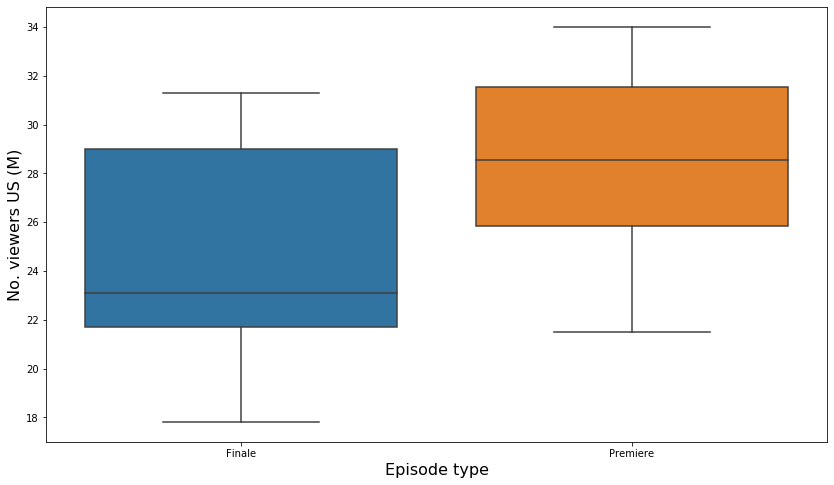

In [160]:
plt.figure(figsize = (14,8))

sns.boxplot(prem_fin.premiere, prem_fin.vie)

plt.xlabel('Episode type', fontsize = 16)
plt.ylabel('No. viewers US (M)', fontsize = 16)



plt.xticks([0, 1], ['Finale', 'Premiere'])


## To reorder x ticks
#df = pd.DataFrame(np.random.rand(37,4), columns=list('ABCD'))
#columns_my_order = ['C', 'A', 'D', 'B']
#fig, ax = plt.subplots()
#for position, column in enumerate(columns_my_order):
#    ax.boxplot(df[column], positions=[position])

#ax.set_xticks(range(position+1))
#ax.set_xticklabels(columns_my_order)
#ax.set_xlim(xmin=-0.5)
#plt.show()


plt.show()



In [2]:
chandler = pd.read_csv('./friends/data/Chandler.csv')

chandler['character'] = 'chandler'

In [3]:
joey = pd.read_csv('./friends/data/Joey.csv')

joey['character'] = 'joey'

In [4]:
monica = pd.read_csv('./friends/data/Monica.csv')

monica['character'] = 'monica'

In [5]:
phoebe = pd.read_csv('./friends/data/Phoebe.csv')

phoebe['character'] = 'phoebe'

In [6]:
rachel = pd.read_csv('./friends/data/Rachel.csv')

rachel['character'] = 'rachel'

In [7]:
ross = pd.read_csv('./friends/data/Ross.csv')

ross['character'] = 'ross'

In [25]:
frames = [chandler, joey, monica, phoebe, rachel, ross]

lines = pd.concat(frames, ignore_index = True)

lines.sample(10)

,season,episode,scene,line,extra,quote_index,character
29320,6,20,1,"Oh yeah, you’re solid. Yeah, you’re just no me.",NaN,11,phoebe
39011,7,22,10,Yeah?,NaN,33,rachel
30871,8,17,2,Oh wait a second you guys…for the last coup...,(noticing a guy sitting by the green post loo...,23,phoebe
34219,2,23,13,Ok.,[Outside with Phoebe and Ryan.],17,rachel
25,1,1,10,"Angela's the screamer, Andrea has cats.",NaN,2,chandler
41474,10,8,8,So bad.,NaN,71,rachel
508,1,15,9,"Last time I do that, I promise.",NaN,10,chandler
27266,4,3,14,"Umm, you might even say that she pulled a Mon...",(They both look at her) (to Monica) (Monica n...,14,phoebe
12743,6,15,3,Oh right great! Welcome aboard!,NaN,27,joey
12207,5,23,11,This is Vegas man! People will pay to see fre...,(Holds up his left hand),15,joey


In [ ]:
#lines['line_sent'] = lines['line'].apply(lambda x: tb.TextBlob(x).sentiment[0])

#lines.sample(10)

In [26]:
lines['line'] = lines['line'].astype(str)

In [27]:
lines = lines.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
lines['Dialogue'] = lines['line'].apply(clean_text)
lines['Dialogue'] = lines['Dialogue'].str.replace('\d+', '')
lines.head()

,season,episode,scene,line,extra,quote_index,character,Dialogue
0,1,1,1,"All right Joey, be nice. So does he have a hu...",NaN,2,chandler,right joey nice hump hump hairpiece
1,1,1,1,Sounds like a date to me.,[Time Lapse],6,chandler,sounds like date
2,1,1,1,"Alright, so I'm back in high school, I'm stan...",NaN,7,chandler,alright im back high school im standing middle...
3,1,1,1,"Then I look down, and I realize there's a pho...",NaN,9,chandler,look realize theres phone
4,1,1,1,That's right.,NaN,11,chandler,thats right


In [28]:
lines["catchphrase"] = 0

lines.loc[(lines['Dialogue'].str.contains('pivot')), 'catchphrase'] = 1
lines.loc[(lines['Dialogue'].str.contains('thanksgiving pants')), 'catchphrase'] = 1
lines.loc[(lines['Dialogue'].str.contains('we were on a break')), 'catchphrase'] = 1
lines.loc[(lines['Dialogue'].str.contains('how you doin$')), 'catchphrase'] = 1
lines.loc[(lines['Dialogue'].str.contains('oh my god')), 'catchphrase'] = 1
lines.loc[(lines['Dialogue'].str.contains('oh my gaww')), 'catchphrase'] = 1 # in case Oh.My.God is spelled differently
lines.loc[(lines['Dialogue'].str.contains('holiday armadillo')), 'catchphrase'] = 1
lines.loc[(lines['Dialogue'].str.contains('my eyes')), 'catchphrase'] = 1
lines.loc[(lines['Dialogue'].str.contains('unagi')), 'catchphrase'] = 1
lines.loc[(lines['Dialogue'].str.contains('va fa napoli')), 'catchphrase'] = 1
lines.loc[(lines['Dialogue'].str.contains('that is brand new information')), 'catchphrase'] = 1
lines.loc[(lines['Dialogue'].str.contains('seven') & (lines['character'] == 'monica')), 'catchphrase'] = 1
lines.loc[(lines['Dialogue'].str.contains('my diamond shoes are too tight')), 'catchphrase'] = 1
lines.loc[(lines['Dialogue'].str.contains('oopah')), 'catchphrase'] = 1 # oopah stands as the end for whooopah
lines.loc[(lines['Dialogue'].str.contains('hes her lobster')), 'catchphrase'] = 1
lines.loc[(lines['Dialogue'].str.contains('they dont know we know they know we know')), 'catchphrase'] = 1
lines.loc[(lines['Dialogue'].str.contains('here come the meat sweats')), 'catchphrase'] = 1
lines.loc[(lines['Dialogue'].str.contains('i wish i could but i dont want to')), 'catchphrase'] = 1
lines.loc[(lines['Dialogue'].str.contains('im fine') & (lines['character'] == 'ross')), 'catchphrase'] = 1
lines.loc[(lines['Dialogue'].str.contains('im fiii')), 'catchphrase'] = 1 # in case I'm fine is spelled differently
lines.loc[(lines['Dialogue'].str.contains('sup with the wack playstation sup')), 'catchphrase'] = 1
lines.loc[(lines['Dialogue'].str.contains('friend zone')), 'catchphrase'] = 1
lines.loc[(lines['Dialogue'].str.contains('you cant say that you dont know')), 'catchphrase'] = 1
lines.loc[(lines['Dialogue'].str.contains('big dull dud')), 'catchphrase'] = 1
lines.loc[(lines['Dialogue'].str.contains('smell the fart acting')), 'catchphrase'] = 1
lines.loc[(lines['Dialogue'].str.contains('im breezy')), 'catchphrase'] = 1
lines.loc[(lines['Dialogue'].str.contains('joey doesnt share food')), 'catchphrase'] = 1
lines.loc[(lines['Dialogue'].str.contains('mmm noodle soup')), 'catchphrase'] = 1
lines.loc[(lines['Dialogue'].str.contains('could i be')), 'catchphrase'] = 1 # for lines saying could I be ... any more ...? 

lines.sample(10)

,season,episode,scene,line,extra,quote_index,character,Dialogue,catchphrase
42596,1,19,3,"Alright, I've gotta go. C'mon, Marcel! C'mon!...",NaN,23,ross,alright ive gotta go cmon marcel cmon gonna go...,0
8489,1,5,2,Why do you have to break up with her? Be a ma...,NaN,7,joey,break man stop calling,0
21209,6,11,2,You got it from Pottery Barn ?!,NaN,15,monica,got pottery barn,0
22959,8,9,3,"Joey, you don’t have to finish that.",NaN,41,monica,joey dont finish,0
590,1,18,1,There just don't happen to be any women in ou...,NaN,38,chandler,dont happen women games,0
37619,6,15,7,Isn’t that a line from the show?!,"(awestruck, then not)",7,rachel,isnt line show,0
44393,3,16,10,No!! No!! I wanna stay. I wanna talk about this.,NaN,38,ross,wanna stay wanna talk,0
41469,10,8,8,"Oh, I just remembered. We do have something...",(gasps),43,rachel,oh remembered something eat monica put somethi...,0
21790,7,2,7,What happened? You still have the Monica wedd...,NaN,12,monica,happened still monica wedding fund dont,0
1059,2,9,2,Which is why geese are so relaxed this time o...,[Ross enters with several bags from shopping.],1,chandler,geese relaed time year,0


In [29]:
lines.groupby('catchphrase').line.count()

catchphrase
0    50881
1       61
Name: line, dtype: int64

In [30]:
lines["overall_ep"] = lines["season"].astype(str) + lines["episode"].astype(str)

lines = pd.merge(lines, df[["overall_ep", "Rating"]], on="overall_ep", how="right")

lines.sample(10)

,season,episode,scene,line,extra,quote_index,character,Dialogue,catchphrase,overall_ep,Rating
37685,8.0,8.0,10.0,Oh my God Stu! I-I can’t believe you did this...,NaN,9.0,monica,oh god stu ii cant believe absolutely sure she...,0.0,88,8.8
6086,2.0,7.0,9.0,Chandler. When did he... when did he... when ...,NaN,24.0,ross,chandler,0.0,27,9.0
38607,8.0,12.0,15.0,Oh God! Thank God you’re home! I’m watching Cujo,NaN,0.0,rachel,oh god thank god youre home im watching cujo,0.0,812,8.6
1900,1.0,10.0,1.0,'That' would be Marcel. You wanna say hi?,NaN,3.0,ross,would marcel wanna say hi,0.0,110,8.1
48540,10.0,9.0,12.0,Really?,(laughing),16.0,joey,really,0.0,109,8.6
32306,7.0,8.0,4.0,All right. We're gonna take Clunkers to Ross’...,(Gets up with Monica to do so.),57.0,phoebe,right gonna take clunkers rosss well back minute,0.0,78,8.2
41878,9.0,3.0,2.0,"Rachel, I can see you dialing! I don't unders...",NaN,9.0,ross,rachel see dialing dont understand,0.0,93,8.2
43853,9.0,13.0,14.0,What? Who?,NaN,30.0,rachel,,0.0,913,8.2
5430,2.0,4.0,9.0,"Maybe that's all we do, what about Julie?",NaN,6.0,rachel,maybe thats julie,0.0,24,8.0
4825,2.0,1.0,6.0,"No-no-no-no-no, I'm not fallin' for that ag...",(grabs his pants),4.0,joey,nonononono im fallin,0.0,21,8.5


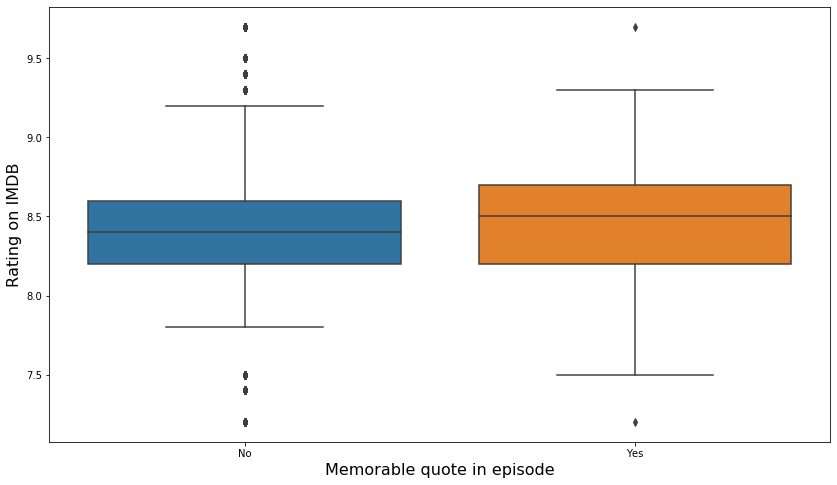

In [75]:
plt.figure(figsize = (14,8))

sns.boxplot(lines.catchphrase, lines.Rating)

plt.xlabel('Memorable quote in episode', fontsize = 16)
plt.ylabel('Rating on IMDB', fontsize = 16)

plt.xticks([0, 1], ['No', 'Yes'])

plt.show()

In [63]:
lines = lines.sort_values(by=['catchphrase'])

episodes_w_quotes = lines.loc[lines['catchphrase'] == 1]

episodes_w_quotes.sample(10)

,season,episode,scene,line,extra,quote_index,character,Dialogue,catchphrase,overall_ep,Rating
841,1.0,4.0,3.0,"Then, uh, then we got dressed, and I-I... I w...","(looks up, realises, and points)",11.0,ross,uh got dressed ii walked bus stop im fine,1.0,14,8.1
38522,8.0,12.0,8.0,Chandler! He’s seven; he’s not stupid.,NaN,16.0,monica,chandler hes seven hes stupid,1.0,812,8.6
1030,1.0,5.0,2.0,"Oh, yeah, last week you had a wonderful, nutt...",(Rachel gives him a dirty look),15.0,ross,oh yeah last week wonderful nutty chocolatey k...,1.0,15,8.5
28769,6.0,17.0,2.0,Unagi is a state of total awareness. Okay? On...,NaN,19.0,ross,unagi state total awareness okay achieving tru...,1.0,617,9.1
46987,10.0,2.0,11.0,"Hey, what are you talking about? I'm fine!",NaN,7.0,ross,hey talking im fine,1.0,102,8.8
28778,6.0,17.0,5.0,I’m sorry I had to take such drastic measures...,(Monica comes out to throw out the garbage an...,7.0,ross,im sorry take drastic measures make point iloo...,1.0,617,9.1
37831,8.0,9.0,3.0,Not now! These are my Thanksgiving pants!,NaN,94.0,joey,thanksgiving pants,1.0,89,9.3
32696,7.0,10.0,11.0,"What happened to Santa, Holiday Armadillo?",NaN,1.0,monica,happened santa holiday armadillo,1.0,710,8.5
9933,3.0,3.0,8.0,"Okay, all right, how's this? 27. Italian-Amer...",(they all turn and look at Joey),12.0,monica,okay right hows italianamerican guy hes actor...,1.0,33,8.1
18970,4.0,21.0,7.0,"Ok, um, uh, more clothes in the dryer? I'm ...",(Ross turns and bangs his head on an open dry...,4.0,ross,ok um uh clothes dryer im fine im fine,1.0,421,7.2


In [64]:
episodes_wo_quotes = lines.loc[lines['catchphrase'] == 0]

episodes_wo_quotes.sample(10)

,season,episode,scene,line,extra,quote_index,character,Dialogue,catchphrase,overall_ep,Rating
42628,9.0,7.0,7.0,God! God! This is not going well.,NaN,0.0,phoebe,god god going well,0.0,97,8.7
34219,7.0,16.0,10.0,"I will be! Listen, I don’t want you teaching ...",NaN,28.0,ross,listen dont want teaching son stuff anymore okay,0.0,716,8.7
39506,8.0,16.0,9.0,So you were saying?,NaN,15.0,rachel,saying,0.0,816,8.3
45607,9.0,21.0,13.0,Actually it's both of us.,NaN,5.0,chandler,actually us,0.0,921,8.2
49777,10.0,14.0,10.0,Hey.,NaN,3.0,chandler,hey,0.0,1014,8.6
30879,7.0,2.0,1.0,Oww!,(entering from her room),5.0,monica,oww,0.0,72,8.3
5141,2.0,2.0,14.0,That's not bad.,(with a mouthful),0.0,ross,thats bad,0.0,22,8.2
42307,9.0,6.0,6.0,"Yeah, he came up...",NaN,10.0,chandler,yeah came,0.0,96,8.4
26,1.0,1.0,11.0,That is amazing.,NaN,1.0,chandler,amazing,0.0,11,8.3
43708,9.0,13.0,9.0,"All right, I will help you out but you have t...",NaN,9.0,chandler,right help promise tell anyone tell,0.0,913,8.2


In [65]:
episodes_w_quotes = episodes_w_quotes.drop_duplicates('overall_ep', keep='last')

episodes_wo_quotes = episodes_wo_quotes.drop_duplicates('overall_ep', keep='last')

episodes_w_quotes.sample(10)


,season,episode,scene,line,extra,quote_index,character,Dialogue,catchphrase,overall_ep,Rating
23160,5.0,17.0,12.0,What are you talking about? She obviously l...,(Pointing out the window.),13.0,monica,talking obviously lives second floor seventh a...,1.0,517,8.5
45764,9.0,21.0,1.0,"Yeah, it's no big deal. I mean, I just met he...",(Joey and Charlie enter. Ross looks at her),11.0,ross,yeah big deal mean met im fine,1.0,921,8.2
40654,8.0,22.0,12.0,"You know everything!! Oh wait, double or noth...",(Phoebe isn’t interested.) (She’s still not i...,8.0,monica,know everything oh wait double nothing bet bab...,1.0,822,8.3
1061,1.0,5.0,15.0,"Ok, um, uh, more clothes in the dryer? I'm ...",(Ross turns and bangs his head on an open dry...,12.0,ross,ok um uh clothes dryer im fine im fine,1.0,15,8.5
22868,5.0,16.0,10.0,"Oh, y'know, what did you mean when you said p...",NaN,33.0,chandler,oh yknow mean said pivot,1.0,516,8.6
1268,1.0,7.0,8.0,Because you waited too long to make your move...,NaN,42.0,joey,waited long make move youre friend zone,1.0,17,9.0
44966,9.0,18.0,3.0,and Ross Seven.,NaN,83.0,monica,ross seven,1.0,918,8.6
2793,1.0,15.0,11.0,Why? It's just that I've waited seven years f...,(The oven goes off.),41.0,monica,ive waited seven years opportunity like cant e...,1.0,115,8.2
21531,5.0,9.0,9.0,I'm fine! I saw a psychiatrist at work today.,NaN,7.0,ross,im fine saw psychiatrist work today,1.0,59,9.1
41670,9.0,2.0,10.0,"Yes. I mean, it’s what we always planned. And...",(Pause),31.0,ross,yes mean always planned plan stick thats call ...,1.0,92,8.6


In [66]:
df_n = episodes_wo_quotes.append(episodes_w_quotes)

In [67]:
df_n = df_n.drop_duplicates('overall_ep', keep='last')

df_n.tail()

,season,episode,scene,line,extra,quote_index,character,Dialogue,catchphrase,overall_ep,Rating
15214,4.0,3.0,3.0,I don’t understand! Last time you went out wi...,NaN,10.0,rachel,dont understand last time went said big dull dud,1.0,43,8.5
23160,5.0,17.0,12.0,What are you talking about? She obviously l...,(Pointing out the window.),13.0,monica,talking obviously lives second floor seventh a...,1.0,517,8.5
38522,8.0,12.0,8.0,Chandler! He’s seven; he’s not stupid.,NaN,16.0,monica,chandler hes seven hes stupid,1.0,812,8.6
13661,3.0,21.0,4.0,"Hmm, no. I mean how can I accept a restaurant...",NaN,4.0,monica,hmm mean accept restaurant iiii cant couldnt e...,1.0,321,8.7
48549,10.0,9.0,14.0,JOEY DOESN'T SHARE FOOD!,(shouting to Ross) (Ross puts the piece back ...,6.0,joey,joey doesnt share food,1.0,109,8.6


In [74]:
memo_quotes = df_n[['catchphrase', 'overall_ep', 'Rating']]

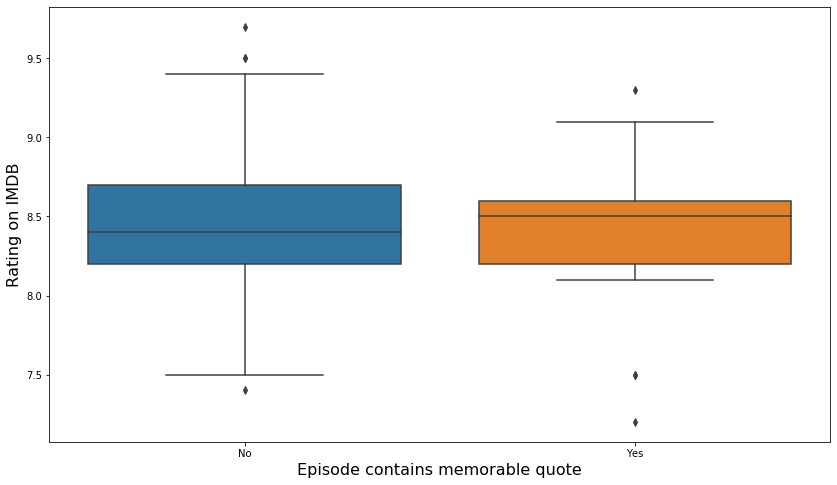

In [76]:
plt.figure(figsize = (14,8))

sns.boxplot(memo_quotes.catchphrase, memo_quotes.Rating)

plt.xlabel('Episode contains memorable quote', fontsize = 16)
plt.ylabel('Rating on IMDB', fontsize = 16)

plt.xticks([0, 1], ['No', 'Yes'])

plt.show()

In [304]:
# select episodes with quotes (1st df)
quotes_in_episode = lines.loc[lines['catchphrase'] == 1]

In [305]:
# select rating for those episodes (2nd df), drop duplicates and convert overall_ep to index
rating_quotes = quotes_in_episode[['overall_ep', 'Rating']]
rating_quotes = rating_quotes.drop_duplicates('overall_ep', keep = 'last')
#rating_quotes = rating_quotes.rename(columns={"overall_ep": "epi_in_show"})
rating_quotes = rating_quotes.set_index('overall_ep')

In [306]:
# drop rating columns in 1st df so rating does not sum
quotes_in_episode = quotes_in_episode.drop(columns=['Rating'])

In [307]:
# sum memorable quotes by episode
quotes = quotes_in_episode.groupby(['overall_ep'])['catchphrase'].sum()

quotes = pd.DataFrame(quotes)

In [308]:
# select episodes without quotes
no_quotes_in_episode = lines.loc[lines['catchphrase'] == 0]

# in episodes without quotes, split rating and drop duplicates
rating_no_quotes = no_quotes_in_episode[['overall_ep', 'Rating']]
rating_no_quotes = rating_no_quotes.drop_duplicates('overall_ep', keep = 'last')
#rating_no_quotes = rating_no_quotes.rename(columns={"overall_ep": "epi_in_show"})
rating_no_quotes = rating_no_quotes.set_index('overall_ep')

# drop rating columns in 1st df so rating does not sum
no_quotes_in_episode = no_quotes_in_episode.drop(columns=['Rating'])

no_quotes = no_quotes_in_episode.groupby(['overall_ep'])['catchphrase'].sum()

no_quotes = pd.DataFrame(no_quotes)

,Rating
overall_ep,
18,8.1
17,9.0
59,9.1
89,9.3
822,8.3
39,9.0
43,8.5
517,8.5
812,8.6


In [309]:
number_quotes = no_quotes.append(quotes)

ratings = rating_no_quotes.append(rating_quotes)



In [313]:
#number_quotes = pd.merge(number_quotes, ratings, on = 'epi_in_show')
nq = number_quotes.join(ratings)

nq['overall_ep'] = nq.index

nq = nq.drop_duplicates('overall_ep', keep = 'last')

In [314]:
nq.tail()
#no_quotes["epi_in_show"] = no_quotes["season"].astype(str) + no_quotes["episode"].astype(str)
#number_quotes = no_quotes.drop_duplicates('epi_in_show', keep='last')

,catchphrase,Rating,overall_ep
overall_ep,,,
95,0.0,8.5,95
96,1.0,8.4,96
97,0.0,8.7,97
98,0.0,8.8,98
99,0.0,8.2,99


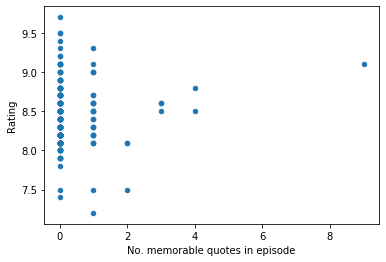

In [315]:
fig, ax = plt.subplots()

nq.plot.scatter(x = 'catchphrase', y = 'Rating', ax = ax)

ax.set_xlabel('No. memorable quotes in episode')

plt.show()

In [316]:
nq.to_csv(r'./number_quotes_in_episodes.csv')

In [12]:
#conn = sqlite3.connect('friends_script.db') #connect to the database
#lines.to_sql('lines', conn, if_exists='replace', index=False) # save into the 'lines' table

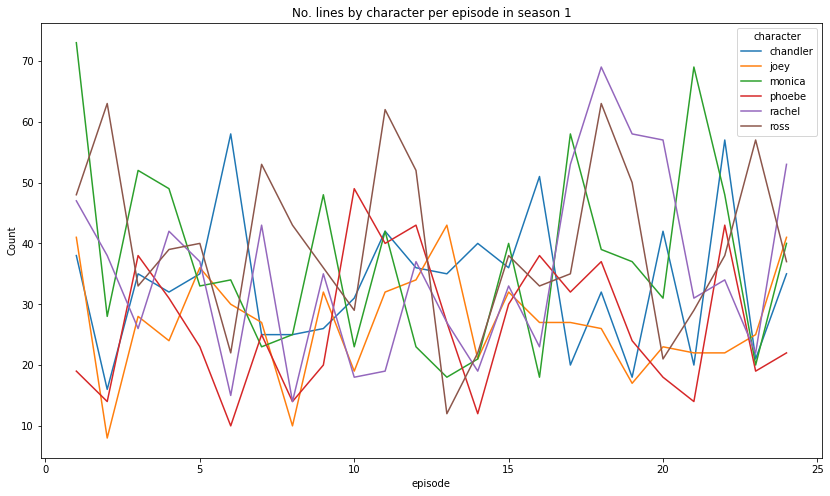

In [183]:
seasons1 = lines.query('season == 1')
axI = seasons1.groupby(['character', 'episode'])['episode'].count().unstack(0).plot(title="No. lines by character per episode in season 1", figsize=(14,8))
_ = axI.set_xlabel('episode')
_ = axI.set_ylabel('Count')

rachel      9147
ross        9071
chandler    8314
monica      8303
joey        8176
Name: character, dtype: int64


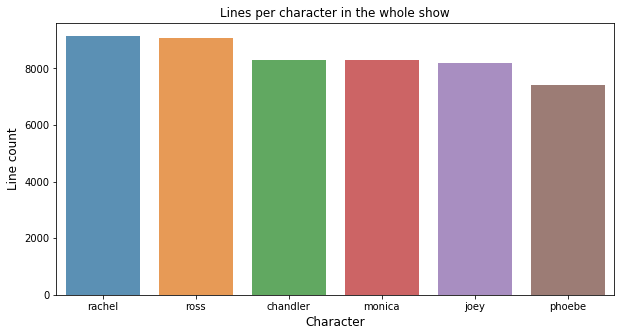

In [78]:
lines_total = lines.character.value_counts()
print(lines_total.head())

lines_total = lines.character.value_counts()
plt.figure(figsize=(10,5))
sns.barplot(lines_total.index, lines_total.values, alpha=0.8)
plt.title('Lines per character in the whole show')
plt.ylabel('Line count', fontsize=12)
plt.xlabel('Character', fontsize=12)
plt.show()

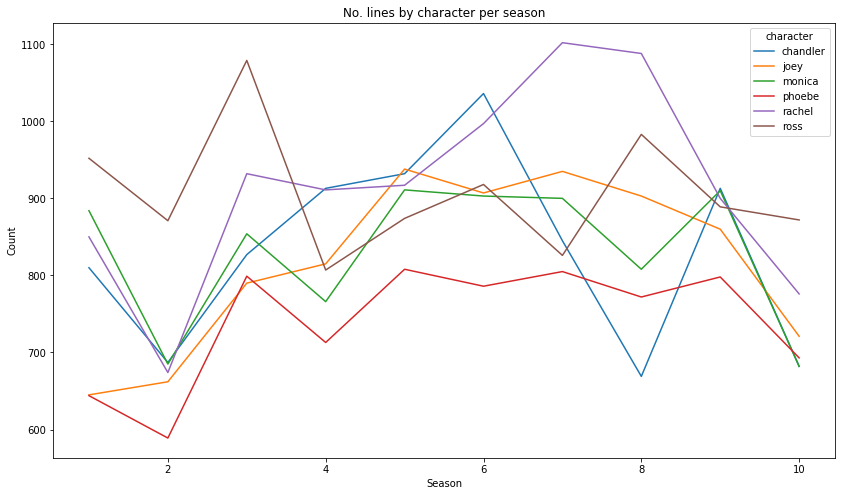

In [61]:
ax = lines.groupby(['character','season'])['season'].count().unstack(0).plot(title="No. lines by character per season", figsize=(14,8))
_ = ax.set_xlabel('Season')
_ = ax.set_ylabel('Count')

In [62]:
lines_season = lines.groupby(['character','season'])['season'].count().unstack(0)

print(lines_season.head())

print(type(lines_season))

character,chandler,joey,monica,phoebe,rachel,ross
season,,,,,,
1,810,645,884,644,850,952
2,687,662,685,589,674,871
3,827,790,854,799,932,1079
4,913,815,766,713,911,807
5,932,938,911,808,917,874


In [71]:
lines_episode = lines.groupby(['character', 'episode', 'season'])['season'].count().unstack(0)

print(lines_episode.head())

print(type(lines_episode))

character       chandler  joey  monica  phoebe  rachel  ross
episode season                                              
1       1           38.0  41.0    73.0    19.0    48.0  47.0
        2           27.0  22.0    27.0    32.0    46.0  45.0
        3           41.0  36.0    30.0    19.0    39.0  49.0
        4           23.0  26.0    26.0    35.0    36.0  44.0
        5           49.0  22.0    43.0    12.0    45.0  55.0
<class 'pandas.core.frame.DataFrame'>


In [ ]:
#####################################################################################################################

In [ ]:
#### ATTEMPT 3

page = requests.get('https://en.wikipedia.org/wiki/Friends_(season_1)')

doc = lh.fromstring(page.content)

silverWinners = doc.xpath('/html/body/div[3]/div[3]/div[4]/div/table[2]/tbody')



# tr_elements = doc.xpath('//tbody')

In [ ]:
silverWinners


#[len(T) for T in tr_elements[:12]]

In [ ]:
tr_elements = doc.xpath('//tbody')
#Create empty list
col=[]
i=0
#For each row, store each first element (header) and an empty list
for t in tr_elements[0]:
    i+=1
    name=t.text_content()
    print('%d:"%s"'%(i,name))
    col.append((name,[]))

In [310]:
friends01 = urlopen('https://en.wikipedia.org/wiki/Friends_(season_1)')

soup01 = BeautifulSoup(friends01, 'html.parser')

In [311]:
soup_table = soup01.find('table', {'class':'wikitable plainrowheaders wikiepisodetable'})


In [312]:
#### ATTEMPT 4

# select nodes of interest
soup_tr = soup_table.find_all('tr',{'class':'vevent'})

print(soup_tr)

# create lists that will then be converted to columns
epi = []
ttl = []
dor = []
wri = []
air = []
vie = []

[<tr class="vevent" style="text-align:center;background:#F2F2F2"><th id="ep1" rowspan="1" scope="row" style="text-align:center">1</th><td style="text-align:center">1</td><td class="summary" style="text-align:left">"<a href="/wiki/The_Pilot_(Friends)" title="The Pilot (Friends)">The Pilot</a>"<sup class="reference" id="cite_ref-11"><a href="#cite_note-11">[a]</a></sup></td><td style="text-align:center"><a href="/wiki/James_Burrows" title="James Burrows">James Burrows</a></td><td style="text-align:center"><a href="/wiki/David_Crane_(producer)" title="David Crane (producer)">David Crane</a> &amp; <a href="/wiki/Marta_Kauffman" title="Marta Kauffman">Marta Kauffman</a></td><td style="text-align:center">September 22, 1994<span style="display:none"> (<span class="bday dtstart published updated">1994-09-22</span>)</span></td><td id="pc456650" style="text-align:center">456650</td><td style="text-align:center">21.5<sup class="noprint Inline-Template Template-Fact" style="white-space:nowrap;">[<

In [313]:
# extract values for episode number, airdate and #viewers in M in the US

for row in soup_tr: #soup_table.find_all('tr', {'class':'vevent'}):
    cells = row.find_all('td')
    if len(cells)==7:    # because each row has 7 'td' nodes
        epi.append(cells[0].find(text=True))
        air.append(cells[4].find(text=True))
        vie.append(cells[6].find(text=True))   

# director and writers are under another child node 'a'
# using this code snippet to extract values:

        #dlnk=cells[2].find_all('a')
        #dor.append(dlnk[1].content[0])
        
# makes an error pop-up

In [324]:
# So, for directors

for row in soup_tr:
    cells = row.find_all('td')
    ditr = []
    for a in cells[2].select('a'):
        # If print() used here, the list appears but with unique elements
        # When I try to add the directors' name for each episode
        
        if a.text in ditr == False:
            ditr.append(a.text)
        else: 
            ditr.append(a.text)   

# only Kevin S. Bright appears
ditr

Kevin S. Bright


In [326]:
# For writers

for row in soup_tr:
    cells = row.find_all('td')
    wrtr = []
    for a in cells[2].select('a'):
        # If print() used here, same problem as above
        # although I think (part of) the problem arises from some cells having two names
        
        if a.text in wrtr == False:
            wrtr.append(a.text)
        else: 
            wrtr.append(a.text)   

# same problem as above
wrtr

['Kevin S. Bright']

,0
0,Kevin S. Bright


In [ ]:
for i in cells:
        subcells = i.find_all('a')
        if len(subcells)==1:
            dor.append(subcells[0].find(text=True))  
            
         for dic in cells[2]:
        subcells = dic.find('a')
        
print(soup.select("html head title")[0].get_text())


for row in soup_tr:
    cells = row.find_all('td')
    if len(cells)==7:
        #tlnk=cells[1].find_all('a')
        #ttl.append(tlnk[1].text)
        
       

In [292]:
friendsDF = pd.DataFrame(epi,columns=['episode'])
friendsDF['title']=ttl
friendsDF['director']=dor
friendsDF['writers']=wri
friendsDF['airdate']=air
friendsDF['US viewers (M)']=vie
friendsDF

ValueError: Length of values does not match length of index

In [234]:
type(dlnk)

bs4.element.ResultSet

In [ ]:
for row in cells: #soup_table.find_all('tr', {'class':'vevent'}):
    subcell = row.find_all('a')

In [ ]:
 dor.append(dlnk[1].contents[0])
        wlnk=cells[3].find_all('a')
        wri.append(wlnk[1].contents[0])

In [235]:
dlnk

[<a class="mw-redirect" href="/wiki/Kevin_Bright" title="Kevin Bright">Kevin S. Bright</a>]

In [ ]:
#### ATTEMPT 2
columns = ['episode', 'title', 'director', 'writers', 'airdate', 'us_viewers_milln']
friends_df = pd.DataFrame(columns = columns)

In [ ]:
for j in soup01.find_all('tr', {'class':'vevent'}):
    temp_list = [x.text for x in soup01.find('tr', {'class':'vevent'}).contents]
    del temp_list[1]
    del temp_list[-2]
    temp_list = [s.replace('[a]','') for s in temp_list]
    temp_list = [re.sub("([\(\[]).*?([\)\]])", "\g<1>\g<2>", s) for s in temp_list] 
    temp_list = [s.replace('[]','') for s in temp_list]
    temp_list = [s.replace('()','') for s in temp_list]
    temp_list = [s.replace('\xa0',' ') for s in temp_list]
    temp_list = [s.replace('"','') for s in temp_list]
    temp_list = [x.strip(' ') for x in temp_list]
    friends_df = friends_df.append(pd.DataFrame([temp_list], columns = columns))
   

In [ ]:
friends_df['season'] = 1

#friends_df.insert(1, 'season', [1])

In [ ]:
friends_df

In [ ]:
# ATTEMPT 1
friends01 = requests.get('https://en.wikipedia.org/wiki/Friends_(season_1)')

friends01_soup = BeautifulSoup('\n'.join(friends01.text.splitlines()[126:188]), "html.parser")

text = [x.text for x in friends01_soup.find_all('td')]

In [ ]:
#### retrieve season, episode number and title

friends = urlopen('https://fangj.github.io/friends/')

friends_soup = BeautifulSoup(friends, "html.parser")

In [ ]:
episodes = [x.text for x in friends_soup.body.find_all('a')] 

episodes

In [ ]:
## create a list and then string to clean data

result = []

for element in episodes:
    result.append(element)

result = str(result)

## drop unnecessary information

result = result.replace('<a href="season/', '')
result = result.replace('.html">', '')
result = result.replace('</a>', '')
result = result.replace('[', ' ')
#result = result.replace(']', '')
result = result.replace('6  The Two Parts', '6  The Two Parts. Part I')
result = result.replace('7  The Two Parts', '7  The Two Parts. Part II')
result = result.replace('The Proposal', 'The Proposal. Part I & II')
result = result.replace('7outtakes','')
result = result.replace('outtakes','')
result = result.replace('That Could Have Been', 'That Could Have Been. Part I')
result = result.replace('The Last One','The Last One. Part I')
result = result.replace(' \' 0','\' 0')

## convert string to list

episodes = list(result.split(','))

episodes

In [ ]:
episodes.append(' 0213 The Superbowl. Part II')
episodes.append(' 0616 That Could Have Been. Part II')
episodes.append(' 0924 In Barbados. Part II')
episodes.append(' 1018 The Last One. Part II')

episodes

In [ ]:
del episodes[episodes.index(' Part I ')]

del episodes[episodes.index(' Part II ')]

del episodes[episodes.index( ' Part I &amp; II')]

del episodes[episodes.index( ' Part I &amp; II')] # because it appears 2 times

del episodes[episodes.index( ' Part I &amp; II]')]

episodes


In [ ]:
episodes

In [ ]:
ep_df = pd.DataFrame(episodes)

ep_df.head()

In [ ]:
ep_df['episode_id'] = ep_df['0'].str[0:4]

In [ ]:
# episode: The Unagi

unagi = urlopen('https://fangj.github.io/friends/season/0617.html')

unagi_soup = BeautifulSoup(unagi,"html.parser")


In [ ]:
#### retrieve episode title

ep_title = unagi_soup.title.text
print(ep_title)

In [ ]:
#### retrieve teleplay and story writers

info = soup.body.p.text 
#print(info)

## parse text
info = info.replace('by: ', '<br>')
info = info.replace('\n', '<br>')

writers = re.split(r'<br>', info) # creates a list

#for x in range(len(writers)):
#    print(writers[x]),
    
teleplay = writers[1]
story = writers[3]

print(teleplay)
print(story)

In [ ]:
season6 = urlopen('https://www.imdb.com/title/tt0108778/episodes?season=6')

season6_soup = BeautifulSoup(season6,"html.parser")

In [ ]:
#### retrieve airdates for season 6

airdate = season6_soup.find_all('div', {'class':'airdate'})

## create a list and then string to clean data

result = []

for element in airdate:
    result.append(element)

result = str(result)

## drop unnecessary information

result = result.replace('</div>', '')
result = result.replace('<div class="airdate">', '')
result = result.replace(',', '')
result = result.replace('     ', '')
result = result.replace('  ','')

## convert string to list

airdate = list(result.split('\n'))

## remove empty rows

del airdate[::2]

airdate

#airdate[3]

In [ ]:
#### retrieve ratings for season 6 episodes

def class_no_xxx(tag):
    

rating = season6_soup.find_all('span', {'class':'ipl-rating-star__rating'})

rating # need to filter

In [ ]:
title = season6_soup.find_all('a')

print(title)


In [ ]:
# scene location and lines per characters
unagi_soup

In [ ]:

location = unagi_soup.find_all('body', {'p':'scene'})


In [ ]:
location

In [ ]:
character = unagi_soup.find_all('b')

character # needs cleaning

In [ ]:
wiki6 = urlopen('https://en.wikipedia.org/wiki/Friends_(season_6)')

In [ ]:
wiki6_soup = BeautifulSoup(wiki6,"html.parser")

In [ ]:
text = wiki6_soup.find_all('th')

text

In [ ]:
airdate = season6_soup.find_all('div', {'class':'airdate'})



[airdate.string for airdate in season6_soup.find_all('div', {'class':'airdate'})]



type(airdate)

# airdate = airdate.to_list()

airdate = airdate.replace('<*>', '')

# Scrape summaries

In [212]:
### season 1

friends01 = urlopen('https://en.wikipedia.org/wiki/Friends_(season_1)')

soup01 = BeautifulSoup(friends01, 'html.parser')

soup_table = soup01.find('table', {'class':'wikitable plainrowheaders wikiepisodetable'})

In [214]:
soup_sum = soup_table.find_all('tr',{'class':'expand-child'})

In [215]:
df_dict = {'summary':[]}            

df_dict_keys = ['summary']

for row in soup_sum:
    tds = row.find_all('td')
    for i in range(len(tds)):
        df_dict[df_dict_keys[i]].append(tds[i].text)

In [217]:
summ01 = pd.DataFrame(df_dict)

summ01['episode'] = summ01.index

summ01['season'] = 1

summ01

,summary,episode,season
0,"\nAfter leaving her fiancé, Barry, at the alta...",0,1
1,\nCarol tells Ross that she is pregnant with h...,1,1
2,\nMonica is dismayed that everyone likes her n...,2,1
3,"\nRoss, feeling morose on the anniversary of h...",3,1
4,\nChandler and Phoebe decide to break up with ...,4,1
5,"\nChandler dates Aurora (Sofia Milos), a beaut...",5,1
6,"\nDuring a New York City-wide power outage, th...",6,1
7,\nRoss and Monica rush to the hospital when th...,7,1
8,"\nRoss wants equal ""belly time"" after learning...",8,1
9,\nThe gang makes a pact not to bring dates to ...,9,1


In [220]:
for i in summ01.episode:
    summ01.episode[i] = i+1

summ01

/Users/lfa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [222]:
### season 2

friends02 = urlopen('https://en.wikipedia.org/wiki/Friends_(season_2)')

soup02 = BeautifulSoup(friends02, 'html.parser')

soup_table = soup02.find('table', {'class':'wikitable plainrowheaders wikiepisodetable'})

soup_sum = soup_table.find_all('tr',{'class':'expand-child'})

df_dict = {'summary':[]}            

df_dict_keys = ['summary']

for row in soup_sum:
    tds = row.find_all('td')
    for i in range(len(tds)):
        df_dict[df_dict_keys[i]].append(tds[i].text)

summ02 = pd.DataFrame(df_dict)

summ02['episode'] = summ02.index

for i in summ02.episode:
    summ02.episode[i] = i+1

summ02['season'] = 2

summ02

/Users/lfa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,summary,episode,season
0,"\nAt Rachel's birthday celebration, Chandler h...",1,2
1,\nThe guys are uncomfortable by seeing Carol b...,2,2
2,\nWhen Chandler refuses to date a woman from w...,3,2
3,\nThe gang is amazed that Phoebe has been secr...,4,2
4,\nWhen a sexy-sounding woman calls the wrong n...,5,2
5,\nWhen Monica rushes Ross to the emergency roo...,6,2
6,\nRachel goes on a date but after drinking too...,7,2
7,\nRoss struggles choosing between his childhoo...,8,2
8,"\nAt Christmastime, Monica, strapped for cash,...",9,2
9,"\nMonica gets back together with Fun Bobby, wh...",10,2


In [223]:
### season 3

friends03 = urlopen('https://en.wikipedia.org/wiki/Friends_(season_3)')

soup03 = BeautifulSoup(friends03, 'html.parser')

soup_table = soup03.find('table', {'class':'wikitable plainrowheaders wikiepisodetable'})

soup_sum = soup_table.find_all('tr',{'class':'expand-child'})

df_dict = {'summary':[]}            

df_dict_keys = ['summary']

for row in soup_sum:
    tds = row.find_all('td')
    for i in range(len(tds)):
        df_dict[df_dict_keys[i]].append(tds[i].text)

summ03 = pd.DataFrame(df_dict)

summ03['episode'] = summ03.index

for i in summ03.episode:
    summ03.episode[i] = i+1

summ03['season'] = 3

summ03

/Users/lfa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,summary,episode,season
0,"\nRoss reveals his sexual fantasy to Rachel, w...",1,3
1,\nRoss is in a hurry to get everyone ready in ...,2,3
2,\nPhoebe is stalked by a man mistaking her for...,3,3
3,\nPhoebe pretends to be Joey's agent and has s...,4,3
4,"\nPhoebe's half-brother, Frank, Jr. visits but...",5,3
5,\nWhen Janice playfully asks the gang if any o...,6,3
6,\nMonica tries returning a bed after receiving...,7,3
7,\nWhen Chandler wants to buy Janice an expensi...,8,3
8,\nEmotions become the feast of the day when th...,9,3
9,\nRachel is fed up with being a waitress so Jo...,10,3


In [224]:
### season 4

friends04 = urlopen('https://en.wikipedia.org/wiki/Friends_(season_4)')

soup04 = BeautifulSoup(friends04, 'html.parser')

soup_table = soup04.find('table', {'class':'wikitable plainrowheaders wikiepisodetable'})

soup_sum = soup_table.find_all('tr',{'class':'expand-child'})

df_dict = {'summary':[]}            

df_dict_keys = ['summary']

for row in soup_sum:
    tds = row.find_all('td')
    for i in range(len(tds)):
        df_dict[df_dict_keys[i]].append(tds[i].text)

summ04 = pd.DataFrame(df_dict)

summ04['episode'] = summ04.index

for i in summ04.episode:
    summ04.episode[i] = i+1

summ04['season'] = 4

summ04

/Users/lfa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,summary,episode,season
0,\nRoss breaks up with Bonnie and gets back wit...,1,4
1,"\nMonica runs into Chip Matthews, Rachel's hig...",2,4
2,\nJoey is enticed when a door-to-door encyclop...,3,4
3,\nPhoebe struggles to remain professional with...,4,4
4,\nPhoebe has a cold that she thinks improves h...,5,4
5,"\nPhoebe helps Monica cater a funeral, but the...",6,4
6,\nRachel finds a new joy in eating alone at re...,7,4
7,"\nDuring Thanksgiving dinner, Joey punishes Ch...",8,4
8,\nMonica and Phoebe buy a van for their new ca...,9,4
9,\nChandler's attempt to set up Rachel up with ...,10,4


In [225]:
### season 5

friends05 = urlopen('https://en.wikipedia.org/wiki/Friends_(season_5)')

soup05 = BeautifulSoup(friends05, 'html.parser')

soup_table = soup05.find('table', {'class':'wikitable plainrowheaders wikiepisodetable'})

soup_sum = soup_table.find_all('tr',{'class':'expand-child'})

df_dict = {'summary':[]}            

df_dict_keys = ['summary']

for row in soup_sum:
    tds = row.find_all('td')
    for i in range(len(tds)):
        df_dict[df_dict_keys[i]].append(tds[i].text)

summ05 = pd.DataFrame(df_dict)

summ05['episode'] = summ05.index

for i in summ05.episode:
    summ05.episode[i] = i+1

summ05['season'] = 5

summ05

/Users/lfa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,summary,episode,season
0,\nAfter Ross mistakenly says Rachel's name ins...,1,5
1,\nPhoebe feels left out when the other friends...,2,5
2,\nFeeling guilty over Phoebe missing out on Lo...,3,5
3,\nChandler starts behaving rather arrogantly a...,4,5
4,\nRoss tells Rachel that Emily does not want h...,5,5
5,"\nPhoebe's mother sends her a fur coat, causin...",6,5
6,"\nRachel tries acting aloof with Danny, despit...",7,5
7,"\nMonica cooks Thanksgiving dinner. After, eve...",8,5
8,\nPhoebe takes a literature course and regrets...,9,5
9,"\nDuring his forced time off from work, Ross, ...",10,5


In [226]:
### season 6

friends06 = urlopen('https://en.wikipedia.org/wiki/Friends_(season_6)')

soup06 = BeautifulSoup(friends06, 'html.parser')

soup_table = soup06.find('table', {'class':'wikitable plainrowheaders wikiepisodetable'})

soup_sum = soup_table.find_all('tr',{'class':'expand-child'})

df_dict = {'summary':[]}            

df_dict_keys = ['summary']

for row in soup_sum:
    tds = row.find_all('td')
    for i in range(len(tds)):
        df_dict[df_dict_keys[i]].append(tds[i].text)

summ06 = pd.DataFrame(df_dict)

summ06['episode'] = summ06.index

for i in summ06.episode:
    summ06.episode[i] = i+1

summ06['season'] = 6

summ06

/Users/lfa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,summary,episode,season
0,"\nIn Vegas, Ross and Rachel initially have no ...",1,6
1,\nRoss promises Rachel to get their Vegas marr...,2,6
2,"\nRoss denies to Phoebe that he loves Rachel, ...",3,6
3,\nJoey's health benefits lapse just as he deve...,4,6
4,"\nRachel forces Ross to get the annulment, tho...",5,6
5,\nOn the night before Chandler moves in with M...,6,6
6,"\nRachel moves in with Phoebe. However, Rachel...",7,6
7,\nRoss wants to impress an impending date by w...,8,6
8,\nRoss is forced to tell Chandler why Jack and...,9,6
9,\nJanine is appearing in the pre-recorded Dick...,10,6


In [227]:
### season 7

friends07 = urlopen('https://en.wikipedia.org/wiki/Friends_(season_7)')

soup07 = BeautifulSoup(friends07, 'html.parser')

soup_table = soup07.find('table', {'class':'wikitable plainrowheaders wikiepisodetable'})

soup_sum = soup_table.find_all('tr',{'class':'expand-child'})

df_dict = {'summary':[]}            

df_dict_keys = ['summary']

for row in soup_sum:
    tds = row.find_all('td')
    for i in range(len(tds)):
        df_dict[df_dict_keys[i]].append(tds[i].text)

summ07 = pd.DataFrame(df_dict)

summ07['episode'] = summ07.index

for i in summ07.episode:
    summ07.episode[i] = i+1

summ07['season'] = 7

summ07

/Users/lfa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,summary,episode,season
0,\nThe gang prepare to celebrate Monica and Cha...,1,7
1,\nMonica is devastated that her parents have s...,2,7
2,\nPhoebe offered to give Monica her grandmothe...,3,7
3,\nRachel must choose between a hunky young guy...,4,7
4,\nChandler is unable to photograph well for hi...,5,7
5,\nJoey and Ross accidentally take a nap togeth...,6,7
6,\nRoss is excited that his dissertation is in ...,7,7
7,\nPhoebe sneaks a dog into the apartment; Chan...,8,7
8,\nMonica's plan to get to know her neighbors b...,9,7
9,"\nRoss wants to introduce Ben, who is half-Jew...",10,7


In [228]:
### season 8

friends08 = urlopen('https://en.wikipedia.org/wiki/Friends_(season_8)')

soup08 = BeautifulSoup(friends08, 'html.parser')

soup_table = soup08.find('table', {'class':'wikitable plainrowheaders wikiepisodetable'})

soup_sum = soup_table.find_all('tr',{'class':'expand-child'})

df_dict = {'summary':[]}            

df_dict_keys = ['summary']

for row in soup_sum:
    tds = row.find_all('td')
    for i in range(len(tds)):
        df_dict[df_dict_keys[i]].append(tds[i].text)

summ08 = pd.DataFrame(df_dict)

summ08['episode'] = summ08.index

for i in summ08.episode:
    summ08.episode[i] = i+1

summ08['season'] = 8

summ08

/Users/lfa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,summary,episode,season
0,"\nEverybody thinks Monica is pregnant, but her...",1,8
1,\nRachel refuses to reveal who the baby's fath...,2,8
2,\nChandler and Monica are about to leave for t...,3,8
3,\nRoss and Rachel argue over who initiated the...,4,8
4,"\nPhoebe dates a guy who works for Monica, cau...",5,8
5,"\nAt Monica and Chandler's Halloween party, Ph...",6,8
6,"\nChandler hires a maid to help Monica, but sh...",7,8
7,\nRachel has dinner with her dad to tell him s...,8,8
8,"\nMonica invites a high school friend, Will (B...",9,8
9,\nChandler disapproves when Monica buys expens...,10,8


In [229]:
### season 9

friends09 = urlopen('https://en.wikipedia.org/wiki/Friends_(season_9)')

soup09 = BeautifulSoup(friends09, 'html.parser')

soup_table = soup09.find('table', {'class':'wikitable plainrowheaders wikiepisodetable'})

soup_sum = soup_table.find_all('tr',{'class':'expand-child'})

df_dict = {'summary':[]}            

df_dict_keys = ['summary']

for row in soup_sum:
    tds = row.find_all('td')
    for i in range(len(tds)):
        df_dict[df_dict_keys[i]].append(tds[i].text)

summ09 = pd.DataFrame(df_dict)

summ09['episode'] = summ09.index

for i in summ09.episode:
    summ09.episode[i] = i+1

summ09['season'] = 9

summ09

/Users/lfa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,summary,episode,season
0,\nAfter Rachel mistakenly thinks Joey proposed...,1,9
1,\nRachel is unable to get Emma to stop crying ...,2,9
2,\nMonica is offered a great job in New York Ci...,3,9
3,"\nMonica visits Chandler in Tulsa, surprising ...",4,9
4,\nThe gang is celebrating Phoebe's birthday at...,5,9
5,\nRoss and Rachel hire a male nanny (Freddie P...,6,9
6,\nRachel is jealous that Ross can make Emma la...,7,9
7,\nRachel's sister Amy (Christina Applegate) un...,8,9
8,"\nOn a girls night out with Phoebe, Rachel giv...",9,9
9,"\nChandler, stuck in Tulsa on Christmas Eve, i...",10,9


In [230]:
### season 10

friends10 = urlopen('https://en.wikipedia.org/wiki/Friends_(season_10)')

soup10 = BeautifulSoup(friends10, 'html.parser')

soup_table = soup10.find('table', {'class':'wikitable plainrowheaders wikiepisodetable'})

soup_sum = soup_table.find_all('tr',{'class':'expand-child'})

df_dict = {'summary':[]}            

df_dict_keys = ['summary']

for row in soup_sum:
    tds = row.find_all('td')
    for i in range(len(tds)):
        df_dict[df_dict_keys[i]].append(tds[i].text)

summ10 = pd.DataFrame(df_dict)

summ10['episode'] = summ10.index

for i in summ10.episode:
    summ10.episode[i] = i+1

summ10['season'] = 10

summ10

/Users/lfa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,summary,episode,season
0,\nRachel and Joey decide to talk to Ross about...,1,10
1,\nMonica and Chandler are having a lot of trou...,2,10
2,"\nAfter Ross sees Monica's tan, he decides to ...",3,10
3,\nRoss and Rachel throw a birthday party for E...,4,10
4,\nRachel's sister Amy (Christina Applegate) sh...,5,10
5,\nRoss applies for a paleontology grant – and ...,6,10
6,\nMonica and Chandler are worried about the ad...,7,10
7,\nMonica and Chandler decide not to host Thank...,8,10
8,\nMonica and Chandler fly to Ohio to meet the ...,9,10
9,\nRachel and Phoebe see Chandler getting into ...,10,10


In [242]:
frames = [summ01, summ02, summ03, summ04, summ05,
         summ06, summ07, summ08, summ09, summ10]

summaries = pd.concat(frames, ignore_index = True)

In [243]:
summaries['summary'] = summaries['summary'].str.replace(r'\n', '')

summaries['summary'] = summaries['summary'].str.replace(r"\(.*\)","")

summaries['summary'] = summaries['summary'].str.replace(r" ,",",")
summaries['summary'] = summaries['summary'].str.replace(r" \.",",")

In [245]:
summaries.tail(10)

,summary,episode,season
217,Monica and Chandler decide not to host Thanksg...,8,10
218,Monica and Chandler fly to Ohio to meet the bi...,9,10
219,Rachel and Phoebe see Chandler getting into a ...,10,10
220,Monica and Rachel throw Phoebe a bachelorette ...,11,10
221,Phoebe's wedding to Mike is nearly upon the ga...,12,10
222,Phoebe tries to teach Joey how to speak French...,13,10
223,Rachel has an interview in a restaurant for Gu...,14,10
224,"Joey's agent Estelle dies, but the group doesn...",15,10
225,As Erica arrives in New York to prepare for th...,16,10
226,"After having sex with Ross, Rachel says it was...",17,10


In [246]:
summaries.to_csv('/Users/lfa/Desktop/friends/data/summaries_Wiki.csv' , index = False)

